In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from statsmodels.stats.proportion import proportions_ztest

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)
/tmp/ipykernel_6330/3676925567.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# path = os.getcwd()
# os.chdir("/home/zahra/Documents/Kaaryar/final_project/G2/Tables/")
os.chdir("./Tables/")
csv_files = glob.glob("*.csv")
tables = {}
# read all the csv files as a dataframe and put them in a dictionary
for idx, table in enumerate(csv_files):
    with open(table, 'r') as f:
        _t = pd.read_csv(table)
        tables.update({table[0:-4]: _t})

In [3]:
# print heads of the tables
for table in tables:
  
  print(f"Table name: {table}")
  print(tables[table].head(), "\n\n")

Table name: points_vouchertype
   Unnamed: 0  id                        created_dt  \
0           0   1  2023-11-08 13:34:23.898485+03:30   
1           1   2  2023-11-08 13:59:04.103501+03:30   
2           2   3  2023-11-08 13:59:32.609198+03:30   
3           3   4  2023-11-08 13:59:56.450473+03:30   
4           4   5  2023-11-08 19:13:50.986496+03:30   

                         updated_dt  is_active        title  lifetime  \
0  2023-11-08 13:57:13.999299+03:30       True   ۲۰ امتیازی     43800   
1  2023-11-08 13:59:04.103518+03:30       True   ۳۰ امتیازی     43800   
2  2023-11-08 13:59:32.609218+03:30       True   ۵۰ امتیازی     43800   
3  2023-11-08 13:59:56.450515+03:30       True  ۱۰۰ امتیازی     43800   
4  2023-11-08 19:13:50.986527+03:30       True         test   1000000   

   times_used_num  times_used_num_per_user  \
0               1                        1   
1               1                        1   
2               1                        1   
3              

In [4]:
# describe numeric columns in the tables
for table in tables:
  print(f"Table name: {table}")
  df = tables[table]
  # keep table of descriptions to add a couple of columns
  describe_df = df.describe(include=[np.number])
  describe_df.loc['size'] = len(df)
  describe_df.loc['count nulls'] = df.isnull().sum()
  print(describe_df, "\n\n")

Table name: points_vouchertype
             Unnamed: 0         id        lifetime  times_used_num  \
count         22.000000  22.000000       22.000000    2.200000e+01   
mean          10.500000  11.500000    64158.181818    4.545507e+05   
std            6.493587   6.493587   210071.739756    8.578611e+05   
min            0.000000   1.000000     1440.000000    1.000000e+00   
25%            5.250000   6.250000     1440.000000    1.000000e+00   
50%           10.500000  11.500000     1440.000000    1.000000e+00   
75%           15.750000  16.750000    43800.000000    7.525000e+01   
max           21.000000  22.000000  1000000.000000    2.000000e+06   
size          22.000000  22.000000       22.000000    2.200000e+01   
count nulls    0.000000   0.000000        0.000000    0.000000e+00   

             times_used_num_per_user  times_used_num_user_per_voucher_type  \
count                      22.000000                             22.000000   
mean                        5.500000      

In [5]:
# describe tables
for table in tables:
  print(f"Table name: {table}")
  # Modifying data type of 'created_dt' and 'updated_dt' columns
  tables[table]['created_dt'] = pd.to_datetime(tables[table]['created_dt'])
  tables[table]['updated_dt'] = pd.to_datetime(tables[table]['updated_dt'])
  df = tables[table]
  # keep table of descriptions to add a couple of columns
  try:
      describe_df = df.describe(include=[object])
  except:
      print("No categorical columns")
      continue
  describe_df.loc['size'] = len(df)
  describe_df.loc['count nulls'] = df.isnull().sum()
  print(describe_df, "\n\n")

Table name: points_vouchertype
                  title
count                22
unique               22
top          ۲۰ امتیازی
freq                  1
size                 22
count nulls           0 


Table name: points_usertransaction
            info
count        893
unique         1
top           {}
freq         893
size         893
count nulls    0 


Table name: questionnaire_question
                                                       context
count                                                       50
unique                                                      48
top          کدامیک جزو برنامه‌های نیک زیستی سازمانی دیجی‌ک...
freq                                                         2
size                                                        50
count nulls                                                  0 


Table name: points_vouchermission
No categorical columns
Table name: points_voucher
                  value
count              1496
unique             1496
top   

## find true values for user persona; if not, we will lose about 1/7th of the users, persona-wise :)

first show distribution of signed up users persona-wise

In [6]:
df_persona = tables["profiles_userpersona"]
# add persona labels 
df_persona = df_persona.merge(tables["profiles_persona"],
 left_on="persona_id", right_on="id")
df_persona["day"] = pd.DatetimeIndex(df_persona["created_dt_x"]).day
df_persona = df_persona[(df_persona["day"] > 11) & (df_persona["day"] < 15)]
df_persona.head()

,Unnamed: 0_x,id_x,created_dt_x,updated_dt_x,is_active_x,persona_id,user_id,Unnamed: 0_y,id_y,created_dt_y,updated_dt_y,is_active_y,title,description,info,day
2,2,22,2023-11-12 00:03:04.801507+03:30,2023-11-12 00:03:04.801528+03:30,True,3,22,3,3,2023-11-08 12:56:39.122266+03:30,2023-11-11 16:52:04.898358+03:30,True,finisher,مثل کوسه : شکارچیان سازمان هستند و همیشه به دن...,{},12
3,3,23,2023-11-12 06:49:01.346935+03:30,2023-11-12 06:49:01.346975+03:30,True,3,23,3,3,2023-11-08 12:56:39.122266+03:30,2023-11-11 16:52:04.898358+03:30,True,finisher,مثل کوسه : شکارچیان سازمان هستند و همیشه به دن...,{},12
4,4,24,2023-11-12 08:49:18.796082+03:30,2023-11-12 08:49:18.796121+03:30,True,3,24,3,3,2023-11-08 12:56:39.122266+03:30,2023-11-11 16:52:04.898358+03:30,True,finisher,مثل کوسه : شکارچیان سازمان هستند و همیشه به دن...,{},12
5,5,25,2023-11-12 09:06:14.745717+03:30,2023-11-12 09:06:14.745745+03:30,True,3,25,3,3,2023-11-08 12:56:39.122266+03:30,2023-11-11 16:52:04.898358+03:30,True,finisher,مثل کوسه : شکارچیان سازمان هستند و همیشه به دن...,{},12
6,6,26,2023-11-12 10:06:55.938753+03:30,2023-11-12 10:06:55.938772+03:30,True,3,26,3,3,2023-11-08 12:56:39.122266+03:30,2023-11-11 16:52:04.898358+03:30,True,finisher,مثل کوسه : شکارچیان سازمان هستند و همیشه به دن...,{},12


In [7]:
count_persona_daily = df_persona.groupby(["day", "title"])["info"].count().reset_index()
# rename columns
count_persona_daily = count_persona_daily.rename(columns={"title": "persona",
                                                        "info": "count"})

# add one row for the missing achievers in day 1
new_row = {"day": 12, "persona": "achiever", "count": 0}
count_persona_daily = pd.concat([pd.DataFrame([new_row]), count_persona_daily], ignore_index=True)
# swap location of finisher and socializer in the df
for idx in range(0, len(count_persona_daily), 4):
    # Swap 
    count_persona_daily.loc[idx+2], count_persona_daily.loc[idx+3] = \
    (count_persona_daily.loc[idx+3], count_persona_daily.loc[idx+2].copy())
count_persona_daily

,day,persona,count
0,12,achiever,0
1,12,explorer,19
2,12,socializer,14
3,12,finisher,145
4,13,achiever,13
5,13,explorer,105
6,13,socializer,68
7,13,finisher,16
8,14,achiever,17
9,14,explorer,156


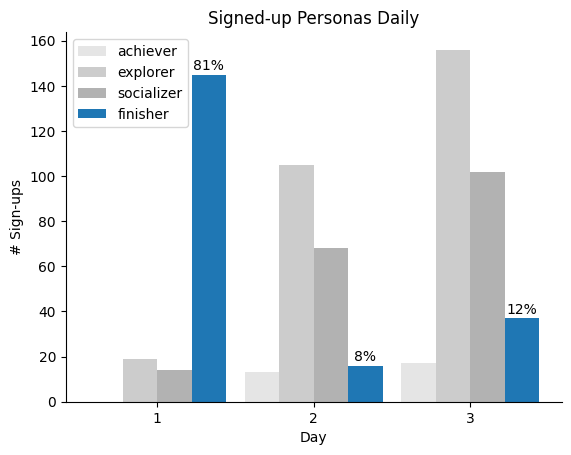

In [8]:
xs = np.arange(3)
barwidth = .22
ax = plt.subplot()
for idx_p, persona in enumerate(count_persona_daily["persona"].unique()):
    if persona == "finisher":
        color = "tab:blue"
        alpha = 1
        
    else:
        color="black"
        alpha = .1 * (idx_p + 1)
    ax.bar(xs+(idx_p - 1.5)*barwidth,
    count_persona_daily[(count_persona_daily["persona"] == persona)]["count"],
    width= barwidth, label=persona, color=color, alpha=alpha)
    
ax.set_xticks(np.arange(3), ["1", "2", "3"])
# add percentages
for x in xs:
    count_finisher_day = \
        count_persona_daily[count_persona_daily["persona"] == "finisher"]["count"].to_list()[x]
    count_all_day = count_persona_daily.groupby("day")["count"].sum().to_list()[x]
    ax.text(x + 1.5*barwidth, 
            count_finisher_day + 2, 
            f"{count_finisher_day / count_all_day * 100 :.0f}%",
            ha="center")
# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel("Day")
ax.set_ylabel("# Sign-ups")
ax.set_title("Signed-up Personas Daily")
plt.legend()
plt.show()

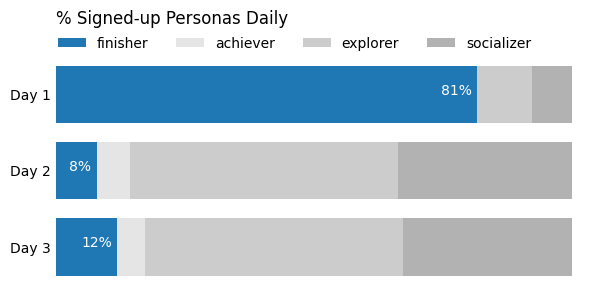

In [9]:
# swap the axes and make it stacked

# first normalize based on daily sign-ups
count_daily = count_persona_daily.groupby("day")["count"].sum().reset_index(name='total')
def normalize_count(row):
    return row["count"] / count_daily[count_daily["day"] == row["day"]]["total"].to_list()[0]



count_persona_daily["normal_count"] = count_persona_daily.apply(normalize_count, axis=1)

ys = np.arange(3)
barwidth = .75
fig, ax = plt.subplots(1,1, figsize=(7,3))
left = count_persona_daily[count_persona_daily["persona"] == "finisher"]["normal_count"]
for idx_p, persona in enumerate(count_persona_daily["persona"].unique()):
    if persona == "finisher":
        color = "tab:blue"
        alpha = 1
        ax.barh(ys,
        width=count_persona_daily[(count_persona_daily["persona"] == persona)]["normal_count"],
        height= barwidth, label=persona, color=color, alpha=alpha)
    else:
        width = count_persona_daily[(count_persona_daily["persona"] == persona)]["normal_count"]
        color="black"
        alpha = .1 * (idx_p + 1)
        ax.barh(ys,
        width=width,
        height= barwidth, label=persona, color=color, alpha=alpha, left=left)
        left += width.to_list()
    

# add percentages
for y in ys:
    ax.text(count_persona_daily[(count_persona_daily["persona"] == persona)]["normal_count"].to_list()[y]-.01, 
            y, 
            f"{count_persona_daily[(count_persona_daily["persona"] == persona)]["normal_count"].to_list()[y] * 100 :.0f}%",
            ha="right",
            c="white")
# Hide the spines
ax.spines[['right', 'bottom', 'left', 'top']].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_yticks(ys, ["Day 1", "Day 2", "Day 3"])
ax.set_xticks([])
# ax.xaxis.tick_top()
ax.invert_yaxis()
# ax.set_xlabel("Day")
# ax.set_xlabel("# Sign-ups")
ax.set_title("% Signed-up Personas Daily", y=1.1, loc='left')
# switch order of the legend
handles, labels = ax.get_legend_handles_labels()
order = [3,0,1,2]
ax.legend([handles[i] for i in order], [labels[i] for i in order], ncols=4,
        bbox_to_anchor=(0.44, 1.05), loc='center', frameon=False)
plt.show()

Now let's work on extracting the algorithm for assigning personas.

In [10]:
# merge profiles_personachoicescore and profiles_useranswer to find out the ture values

# prevent duplicate columns
cols_to_use = tables["profiles_personachoicescore"].columns.difference(tables["profiles_useranswer"].columns)
df = tables["profiles_useranswer"].merge(tables["profiles_personachoicescore"][cols_to_use], how="left", left_on="answer_id", right_on="choice_id")
# keep useful cols only
df = df[["id", "user_id", "choice_id", "persona_id"]]

# rename persona_id column to distinguish with action persona
df = df.rename(columns={"persona_id": "choice_persona_id"})

# merge created df with actual values for user_persona
df = df.merge(tables["profiles_userpersona"], on="user_id")
# keep useful cols only
df = df[["user_id", "choice_id", "choice_persona_id", "persona_id"]]
df.head()

,user_id,choice_id,choice_persona_id,persona_id
0,20,1,2,3
1,20,3,3,3
2,20,5,2,3
3,20,9,3,3
4,20,11,1,3


In [11]:
# apply count to see if it was the way they calculated persona

for id in df["user_id"].unique():
  # skip wrong values
  if id <= 163:
    continue
  df_id = df.loc[df["user_id"]==id]
  calculated_persona = df_id["choice_persona_id"].value_counts().index.tolist()[0]
  if df_id["persona_id"].tolist()[0] != calculated_persona:
    print(f"id:{id}, calculated value is {calculated_persona}, actual value is {df_id['persona_id'].tolist()[0]}")
    print(f"counts are \n{df_id['choice_persona_id'].value_counts()}")

id:167, calculated value is 1, actual value is 4
counts are 
choice_persona_id
1    4
4    4
3    2
2    2
Name: count, dtype: int64
id:174, calculated value is 2, actual value is 3
counts are 
choice_persona_id
2    4
3    4
4    2
1    2
Name: count, dtype: int64
id:176, calculated value is 2, actual value is 4
counts are 
choice_persona_id
2    5
4    5
1    1
3    1
Name: count, dtype: int64
id:177, calculated value is 2, actual value is 4
counts are 
choice_persona_id
2    4
4    4
1    3
3    1
Name: count, dtype: int64
id:193, calculated value is 1, actual value is 4
counts are 
choice_persona_id
1    4
4    4
2    3
3    1
Name: count, dtype: int64
id:196, calculated value is 2, actual value is 4
counts are 
choice_persona_id
2    5
4    5
1    1
3    1
Name: count, dtype: int64
id:197, calculated value is 2, actual value is 4
counts are 
choice_persona_id
2    4
4    4
1    2
3    2
Name: count, dtype: int64
id:202, calculated value is 2, actual value is 4
counts are 
choice_p

In [12]:
# verify my theory on random selection when there are multiple max values
for id in df["user_id"].unique():
  # skip wrong values
  if id <= 163:
    continue
  df_id = df.loc[df["user_id"]==id]
  persona_counts = df_id["choice_persona_id"].value_counts()
  max_value = persona_counts.tolist()[0]
  # check if there are other max(s)
  count_max_values = sum([1 if max_value == count else 0 for count in persona_counts.tolist()])
  if count_max_values > 1:
    print(f"id:{id}, Persona is {df_id['persona_id'].tolist()[0]}")
    print(f"counts are \n{df_id['choice_persona_id'].value_counts()}")



id:167, Persona is 4
counts are 
choice_persona_id
1    4
4    4
3    2
2    2
Name: count, dtype: int64
id:174, Persona is 3
counts are 
choice_persona_id
2    4
3    4
4    2
1    2
Name: count, dtype: int64
id:176, Persona is 4
counts are 
choice_persona_id
2    5
4    5
1    1
3    1
Name: count, dtype: int64
id:177, Persona is 4
counts are 
choice_persona_id
2    4
4    4
1    3
3    1
Name: count, dtype: int64
id:189, Persona is 2
counts are 
choice_persona_id
2    4
1    4
4    3
3    1
Name: count, dtype: int64
id:193, Persona is 4
counts are 
choice_persona_id
1    4
4    4
2    3
3    1
Name: count, dtype: int64
id:195, Persona is 4
counts are 
choice_persona_id
4    4
2    4
1    3
3    1
Name: count, dtype: int64
id:196, Persona is 4
counts are 
choice_persona_id
2    5
4    5
1    1
3    1
Name: count, dtype: int64
id:197, Persona is 4
counts are 
choice_persona_id
2    4
4    4
1    2
3    2
Name: count, dtype: int64
id:202, Persona is 4
counts are 
choice_persona_id
2   

In [13]:
# it seems like whenever there was more that one max, they picked the higher
# label for persona; let's check this theory!
count_wrongs = 0
for id in df["user_id"].unique():
  # skip wrong values
  if id <= 163:
    continue
  df_id = df.loc[df["user_id"]==id]
  persona_counts = df_id["choice_persona_id"].value_counts()
  max_value = persona_counts.tolist()[0]
  # check if there are other max(s)
  if_max = [1 if max_value == count else 0 for count in persona_counts.tolist()]
  count_max_values = sum(if_max)
  if count_max_values > 1:
    # find max persona id for persona counts
    proposed_persona = max([persona for idx, persona in enumerate(persona_counts.index.to_list()) if if_max[idx]==1])
    if proposed_persona != df_id['persona_id'].tolist()[0]:
      print("wrong persona")
      print(f"id:{id}\n Persona is {df_id['persona_id'].tolist()[0]}, Proposed persona is {proposed_persona}")
      print(f"counts are \n{df_id['choice_persona_id'].value_counts()}")
      count_wrongs += 1
print(f"Number of wrong predictions: {count_wrongs}")

wrong persona
id:254
 Persona is 3, Proposed persona is 4
counts are 
choice_persona_id
2    3
4    3
1    3
3    3
Name: count, dtype: int64
wrong persona
id:348
 Persona is 3, Proposed persona is 4
counts are 
choice_persona_id
2    3
4    3
1    3
3    3
Name: count, dtype: int64
wrong persona
id:423
 Persona is 3, Proposed persona is 4
counts are 
choice_persona_id
1    3
3    3
2    3
4    3
Name: count, dtype: int64
wrong persona
id:446
 Persona is 3, Proposed persona is 4
counts are 
choice_persona_id
1    3
4    3
2    3
3    3
Name: count, dtype: int64
wrong persona
id:476
 Persona is 3, Proposed persona is 4
counts are 
choice_persona_id
4    4
3    4
2    3
1    1
Name: count, dtype: int64
wrong persona
id:547
 Persona is 3, Proposed persona is 4
counts are 
choice_persona_id
1    3
4    3
2    3
3    3
Name: count, dtype: int64
wrong persona
id:604
 Persona is 3, Proposed persona is 4
counts are 
choice_persona_id
1    3
3    3
4    3
2    3
Name: count, dtype: int64
wrong 

In [14]:
# in addition to picking the highest id, persona 3 was the highest priority!
count_wrongs = 0
for id in df["user_id"].unique():
  # skip wrong values
  if id <= 163:
    continue
  df_id = df.loc[df["user_id"]==id]
  persona_counts = df_id["choice_persona_id"].value_counts()
  max_value = persona_counts.tolist()[0]
  # check if there are other max(s)
  if_max = [1 if max_value == count else 0 for count in persona_counts.tolist()]
  count_max_values = sum(if_max)
  if count_max_values > 1:
    # find max persona id for persona counts
    proposed_persona = max([persona for idx, persona in enumerate(persona_counts.index.to_list()) if if_max[idx]==1])
    # if 3 in maxs, pick that!
    persona_counts_dict = persona_counts.to_dict()
    if 3 in persona_counts_dict and persona_counts_dict[3] == max_value:
      proposed_persona = 3
    if proposed_persona != df_id['persona_id'].tolist()[0]:
      print("wrong persona")
      print(f"id:{id}\n Persona is {df_id['persona_id'].tolist()[0]}, Proposed persona is {proposed_persona}")
      print(f"counts are \n{df_id['choice_persona_id'].value_counts()}")
      count_wrongs += 1
print(f"Number of wrong predictions: {count_wrongs}")

Number of wrong predictions: 0


Yay! We found out the rule for user_persona based on choices. First, we count the number of choices related to each persona. Then, we find the max value; if there is one max value, it is the participant's persona; if not, if there is persona id 3, it will be the user persona, otherwise, it will be highest persona id! Let's update the faulty user_personas then!

In [15]:
# apply method to wrong values in user persona table (user_id below and equal to 163)
for id in df["user_id"].unique():
  # skip correct values
  if id > 163:
    continue
  df_id = df.loc[df["user_id"]==id]
  persona_counts = df_id["choice_persona_id"].value_counts()
  max_value = persona_counts.tolist()[0]
  # check if there are other max(s) and count them
  count_max_values = sum([1 if max_value == count else 0 for count in persona_counts.tolist()])
  persona_priority = [3, 4, 2, 1]
  proposed_persona = max(persona_counts.index.to_list()[:count_max_values],
                       key=lambda persona: -persona_priority.index(persona))
  
  # update profile_userpersona table accordingly
  tables["profiles_userpersona"].loc[tables["profiles_userpersona"]["user_id"] == id, "persona_id"] = proposed_persona

What about daily count of persona now?

In [16]:
df_persona = tables["profiles_userpersona"]
# add persona labels 
df_persona = df_persona.merge(tables["profiles_persona"],
 left_on="persona_id", right_on="id")
df_persona["day"] = pd.DatetimeIndex(df_persona["created_dt_x"]).day
df_persona = df_persona[(df_persona["day"] > 11) & (df_persona["day"] < 15)]
df_persona.head()

,Unnamed: 0_x,id_x,created_dt_x,updated_dt_x,is_active_x,persona_id,user_id,Unnamed: 0_y,id_y,created_dt_y,updated_dt_y,is_active_y,title,description,info,day
2,2,22,2023-11-12 00:03:04.801507+03:30,2023-11-12 00:03:04.801528+03:30,True,3,22,3,3,2023-11-08 12:56:39.122266+03:30,2023-11-11 16:52:04.898358+03:30,True,finisher,مثل کوسه : شکارچیان سازمان هستند و همیشه به دن...,{},12
3,3,23,2023-11-12 06:49:01.346935+03:30,2023-11-12 06:49:01.346975+03:30,True,4,23,2,4,2023-11-08 12:58:00.352713+03:30,2023-11-08 12:58:00.352741+03:30,True,socializer,مثل پروانه: آنها به سمت افراد دیگر کشیده می شو...,{},12
4,4,24,2023-11-12 08:49:18.796082+03:30,2023-11-12 08:49:18.796121+03:30,True,2,24,1,2,2023-11-08 12:56:09.612394+03:30,2023-11-08 12:57:32.149250+03:30,True,explorer,مثل گربه ها: کنجکاو، عاشق گشت و گذار و تجربه ه...,{},12
5,5,25,2023-11-12 09:06:14.745717+03:30,2023-11-12 09:06:14.745745+03:30,True,2,25,1,2,2023-11-08 12:56:09.612394+03:30,2023-11-08 12:57:32.149250+03:30,True,explorer,مثل گربه ها: کنجکاو، عاشق گشت و گذار و تجربه ه...,{},12
6,6,26,2023-11-12 10:06:55.938753+03:30,2023-11-12 10:06:55.938772+03:30,True,1,26,0,1,2023-11-08 12:55:42.009467+03:30,2023-11-08 12:55:42.009499+03:30,True,achiever,مثل جایزه بگیر ها: آنها عاشق جمع آوری چیزهای ب...,{},12


In [17]:
count_persona_daily = df_persona.groupby(["day", "title"])["info"].count().reset_index()
# rename columns
count_persona_daily = count_persona_daily.rename(columns={"title": "persona",
                                                        "info": "count"})

# swap location of finisher and socializer in the df
for idx in range(0, len(count_persona_daily)-1, 4):
    # Swap 
    count_persona_daily.loc[idx+2], count_persona_daily.loc[idx+3] = \
    (count_persona_daily.loc[idx+3], count_persona_daily.loc[idx+2].copy())
count_persona_daily

,day,persona,count
0,12,achiever,17
1,12,explorer,77
2,12,socializer,61
3,12,finisher,23
4,13,achiever,13
5,13,explorer,105
6,13,socializer,68
7,13,finisher,16
8,14,achiever,17
9,14,explorer,156


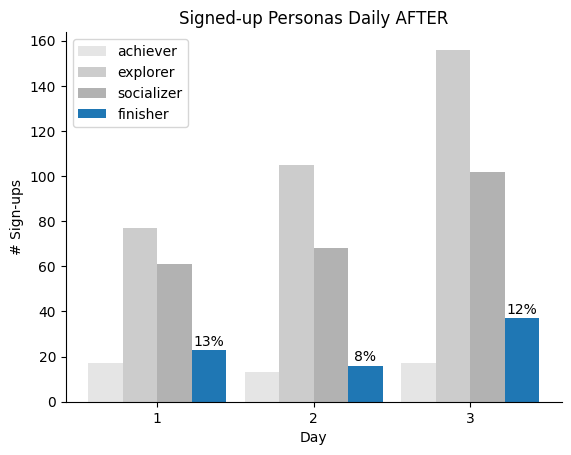

In [18]:
xs = np.arange(3)
barwidth = .22
ax = plt.subplot()
for idx_p, persona in enumerate(count_persona_daily["persona"].unique()):
    if persona == "finisher":
        color = "tab:blue"
        alpha = 1
        
    else:
        color="black"
        alpha = .1 * (idx_p + 1)
    ax.bar(xs+(idx_p - 1.5)*barwidth,
    count_persona_daily[(count_persona_daily["persona"] == persona)]["count"],
    width= barwidth, label=persona, color=color, alpha=alpha)
    
ax.set_xticks(np.arange(3), ["1", "2", "3"])
# add percentages
for x in xs:
    count_finisher_day = \
        count_persona_daily[count_persona_daily["persona"] == "finisher"]["count"].to_list()[x]
    count_all_day = count_persona_daily.groupby("day")["count"].sum().to_list()[x]
    ax.text(x + 1.5*barwidth, 
            count_finisher_day + 2, 
            f"{count_finisher_day / count_all_day * 100 :.0f}%",
            ha="center")
# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel("Day")
ax.set_ylabel("# Sign-ups")
ax.set_title("Signed-up Personas Daily AFTER")
plt.legend()
plt.show()

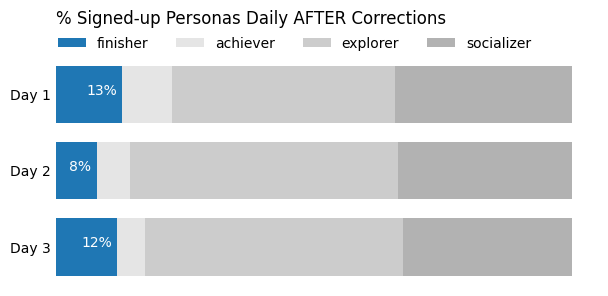

In [19]:
# swap the axes and make it stacked

# first normalize based on daily sign-ups
count_daily = count_persona_daily.groupby("day")["count"].sum().reset_index(name='total')
def normalize_count(row):
    return row["count"] / count_daily[count_daily["day"] == row["day"]]["total"].to_list()[0]



count_persona_daily["normal_count"] = count_persona_daily.apply(normalize_count, axis=1)

ys = np.arange(3)
barwidth = .75
fig, ax = plt.subplots(1,1, figsize=(7,3))
left = count_persona_daily[count_persona_daily["persona"] == "finisher"]["normal_count"]
for idx_p, persona in enumerate(count_persona_daily["persona"].unique()):
    if persona == "finisher":
        color = "tab:blue"
        alpha = 1
        ax.barh(ys,
        width=count_persona_daily[(count_persona_daily["persona"] == persona)]["normal_count"],
        height= barwidth, label=persona, color=color, alpha=alpha)
    else:
        width = count_persona_daily[(count_persona_daily["persona"] == persona)]["normal_count"]
        color="black"
        alpha = .1 * (idx_p + 1)
        ax.barh(ys,
        width=width,
        height= barwidth, label=persona, color=color, alpha=alpha, left=left)
        left += width.to_list()
    

# add percentages
for y in ys:
    ax.text(count_persona_daily[(count_persona_daily["persona"] == persona)]["normal_count"].to_list()[y]-.01, 
            y, 
            f"{count_persona_daily[(count_persona_daily["persona"] == persona)]["normal_count"].to_list()[y] * 100 :.0f}%",
            ha="right",
            c="white")
# Hide the spines
ax.spines[['right', 'bottom', 'left', 'top']].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_yticks(ys, ["Day 1", "Day 2", "Day 3"])
ax.set_xticks([])
# ax.xaxis.tick_top()
ax.invert_yaxis()
# ax.set_xlabel("Day")
# ax.set_xlabel("# Sign-ups")
ax.set_title("% Signed-up Personas Daily AFTER Corrections", y=1.1, loc='left')
# switch order of the legend
handles, labels = ax.get_legend_handles_labels()
order = [3,0,1,2]
ax.legend([handles[i] for i in order], [labels[i] for i in order], ncols=4,
        bbox_to_anchor=(0.44, 1.05), loc='center', frameon=False)
plt.show()

## Attendance trends

First, let's take a look at newcomers

In [20]:
# check col types
df = tables["profiles_userpersona"]
df.dtypes

Unnamed: 0                        int64
id                                int64
created_dt    datetime64[ns, UTC+03:30]
updated_dt    datetime64[ns, UTC+03:30]
is_active                          bool
persona_id                        int64
user_id                           int64
dtype: object

In [21]:
# check count of new participants for each day
df["created_dt"].dt.floor('d').value_counts().reset_index(name='count')

,created_dt,count
0,2023-11-14 00:00:00+03:30,312
1,2023-11-13 00:00:00+03:30,202
2,2023-11-12 00:00:00+03:30,178
3,2023-11-15 00:00:00+03:30,9
4,2023-11-11 00:00:00+03:30,2


Interesting! The fair started at 17:00 on 2023-11-11 and 3 days later on 2023-11-14 at 17:00. It seems like the sign up form was open after that. Let's limit the data to the date and time of the actual fair.

In [22]:
# create date and times by the end of each day
dt_intervals = pd.date_range("2023-11-11 17:00:00", periods=4, freq="d")
# make them as strings to avoid later errors!
dt_intervals = dt_intervals.strftime('%Y-%m-%d %H:%M:%S')
dt_intervals

Index(['2023-11-11 17:00:00', '2023-11-12 17:00:00', '2023-11-13 17:00:00',
       '2023-11-14 17:00:00'],
      dtype='object')

In [23]:
# change the range and count each 24 hours of the fair
count_applicant_days = []
for start_d, end_d in zip(dt_intervals[:-1], dt_intervals[1:]):
    count_applicant_days.append(len(df[(df["created_dt"] >= start_d) & (df["created_dt"] < end_d)]))
count_applicant_days

[142, 196, 324]

Plot registration vs active users.

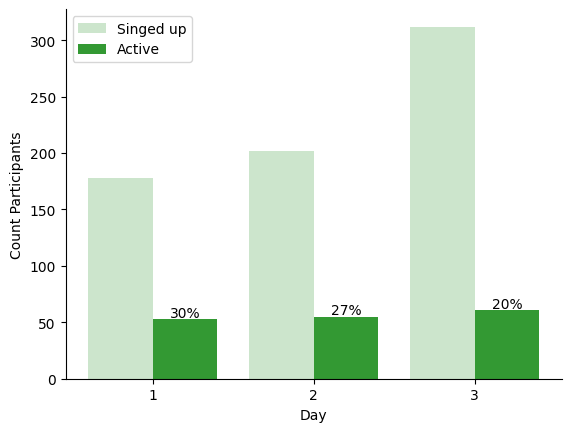

In [24]:
df["day"] = pd.DatetimeIndex(df["created_dt"]).day
df = df[(df["day"] > 11) & (df["day"] < 15)]
scored_users = tables["points_userbalance"]["user_id"]
barwidth = .4
x = np.arange(3)

ax = plt.subplot()
ax.bar(x+(-.5)*barwidth, df.groupby("day")["user_id"].count().to_list(),
        width=barwidth, color='g', alpha=.2, label="Singed up")
# check how many of each day were active in any day
for idx, day in enumerate(range(12, 15)):
    user_reg_day = df[df["day"] == day]["user_id"]
    count_active = sum(user in user_reg_day for user in scored_users)
    ax.bar(idx + .5*barwidth, count_active, width=barwidth, color='g',
            alpha=.8, label="Active")
    ax.text(idx +.5*barwidth, count_active+2, 
           f"{count_active/len(user_reg_day)*100:.0f}%",
           ha="center")

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel("Day")
ax.set_ylabel("Count Participants") 
ax.set_xticks(x, ["1", "2", "3"])
# remove duplicate legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2])
plt.show()

<Axes: xlabel='day', ylabel='amount'>

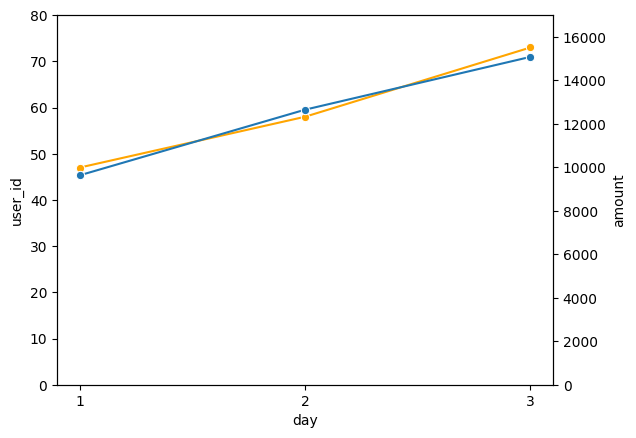

In [25]:
# score gained daily
df = tables["points_usertransaction"]
df["day"] = pd.DatetimeIndex(df["created_dt"]).day
# df = df[df["user_id"].isin(engaged_user_ids)]
df = df[(df["day"] > 11) & (df["day"] < 15)]
active_count_daily = df.groupby(["day"]).agg({"user_id": "nunique"}).reset_index()
score_daily = df.groupby(["day"])["amount"].sum().reset_index()

ax = plt.subplot()
ax.set_ylim([0, 80])
sns.lineplot(data=active_count_daily, x="day", y="user_id", ax=ax, marker="o", color="orange")
ax.set_xticks(list(range(12, 15)))
ax.set_xticklabels([1, 2, 3])
ax2 = plt.twinx()
ax2.set_ylim([0, 17000])
sns.lineplot(data=score_daily, x="day", y="amount", ax=ax2, marker="o")


Text(0, 0.5, '# Active Participants')

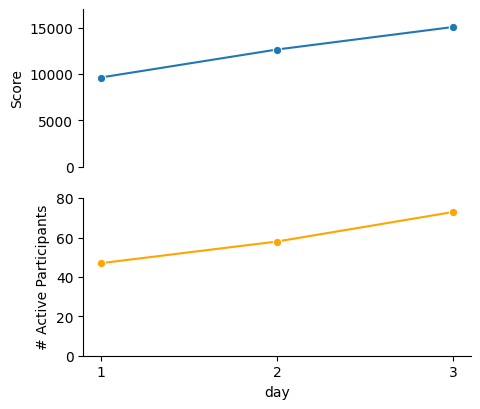

In [26]:
# try another approach
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize = (5, 4.5))

sns.lineplot(data=score_daily, x="day", y="amount", ax=ax1, marker="o")
ax1.set_xticks(list(range(12, 15)))
ax1.set_xticklabels([1, 2, 3])
ax1.spines[['right', 'top', 'bottom']].set_visible(False)
ax1.set_ylim([0, 17000])
ax1.set_ylabel("Score")
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)      # ticks along the bottom edge are off


sns.lineplot(data=active_count_daily, x="day", y="user_id", ax=ax2, marker="o", color="orange")
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_ylim([0, 80])
ax2.set_ylabel("# Active Participants")

In [27]:
active_count_daily

,day,user_id
0,12,47
1,13,58
2,14,73


Let's check the distribution of daily scores and transactions.

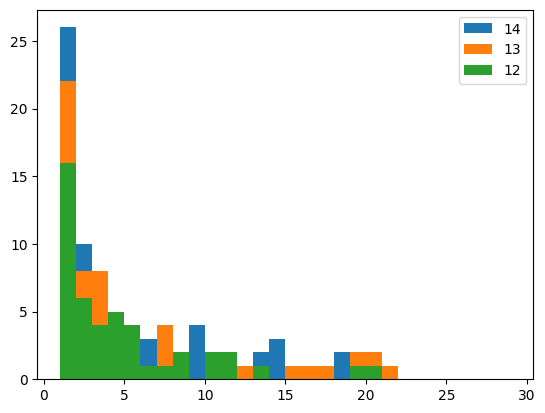

In [28]:
# score gained daily
df = tables["points_usertransaction"]
df["day"] = pd.DatetimeIndex(df["created_dt"]).day
# df = df[df["user_id"].isin(engaged_user_ids)]
df = df[(df["day"] > 11) & (df["day"] < 15)]
daily_activity = df.groupby(["day", "user_id"])["amount"].count().reset_index()
fig, ax = plt.subplots()
for day in range(14, 11, -1):
    
    ax.hist(daily_activity[daily_activity["day"] == day]["amount"], bins=np.arange(1,30), label=str(day))

ax.legend()

We can see that the activity on the last day was highest in almost all transaction ranges. Later we will check if gamification and having leaderboard has worked or not.

Let's take a look at mission submissions daily

In [29]:
# check col types
df = tables["questionnaire_questionnaireuserresult"]
df.dtypes

Unnamed: 0                              int64
id                                      int64
created_dt          datetime64[ns, UTC+03:30]
updated_dt          datetime64[ns, UTC+03:30]
is_active                                bool
score                                 float64
voucher                                object
questionnaire_id                        int64
user_id                                 int64
dtype: object

In [30]:
# Print range of submission times
print(f"First submission was at {min(df['created_dt'])}; The last one happend at {max(df['created_dt'])}")

First submission was at 2023-11-11 21:00:33.389493+03:30; The last one happend at 2023-11-15 23:35:13.456992+03:30


The last submission happend after the end of the fair. We need to consider that!

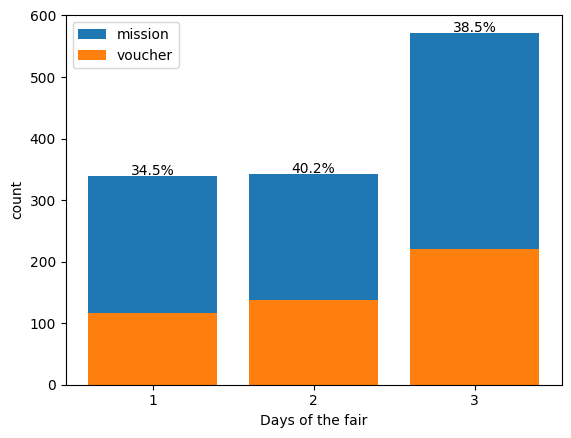

In [31]:
# change the range and count each 24 hours of the fair
count_mission_submissions_days = []
count_vouchers_days = []
df_vouchers = df.dropna(subset=["voucher"])
for start_d, end_d in zip(dt_intervals[:-1], dt_intervals[1:]):
    count_mission_submissions_days.append(len(df[(df["created_dt"] >= start_d) & (df["created_dt"] < end_d)]))
    count_vouchers_days.append(len(df_vouchers[(df_vouchers["created_dt"] >= start_d) & (df_vouchers["created_dt"] < end_d)]))
percentage_voucher_won = [round(v/m, 3) for v,m in zip(count_vouchers_days, count_mission_submissions_days)]
days = ["1", "2", "3"]
plt.bar(days, count_mission_submissions_days, label="mission")
plt.bar(days, count_vouchers_days, label="voucher")
plt.xlabel("Days of the fair")
plt.ylabel("count")
# add percentages to the top of the bars
for bar in range(3):

    plt.text(bar, count_mission_submissions_days[bar]+1, f"{percentage_voucher_won[bar]*100}%",
            horizontalalignment='center')
plt.legend()
plt.show()

Let's see the hourly submission trend

In [32]:
# add a column to extract the hour
df["hour"] = pd.DatetimeIndex(df["created_dt"]).hour
# update table
tables["questionnaire_questionnaireuserresult"] = df

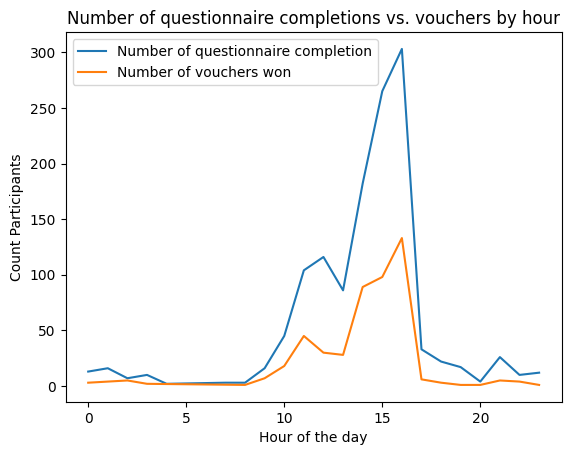

In [33]:
count_questionnaire_hourly = df.groupby("hour")["id"].count()
count_vouchers_hourly = df.dropna(subset=["voucher"]).groupby("hour")["id"].count()
plt.plot(count_questionnaire_hourly, label="Number of questionnaire completion")
plt.plot(count_vouchers_hourly, label="Number of vouchers won")
plt.legend(loc='upper left')
plt.xlabel("Hour of the day")
plt.ylabel("Count Participants")
plt.title("Number of questionnaire completions vs. vouchers by hour")
plt.show()

### Distribution of questionnaire fillings

<Axes: >

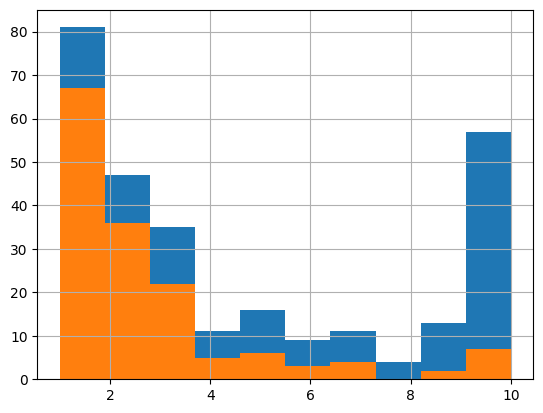

In [34]:
df_q_result = tables["questionnaire_questionnaireuserresult"]
df_q_result = df_q_result[
    df_q_result["created_dt"] < dt_intervals[-1]]
count_questionnaire_id = df_q_result.groupby(["user_id"])["questionnaire_id"].count()
count_questionnaire_id.hist()
# how about people who have got no voucher from filling questionnaires
user_id_voucher = df_q_result[~df_q_result["voucher"].isna()]["user_id"].unique()
user_id_no_voucher_q = df_q_result[~df_q_result["user_id"].isin(user_id_voucher)]["user_id"].unique()
count_questionnaire_no_voucher = df_q_result[df_q_result["user_id"].isin(user_id_no_voucher_q)].groupby(["user_id"])["questionnaire_id"].count()
count_questionnaire_no_voucher.hist()

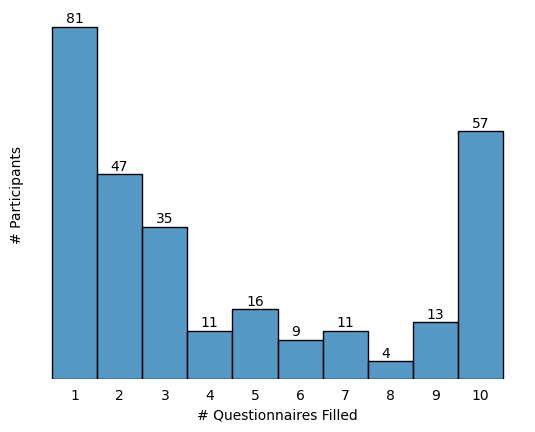

In [35]:
# make more eye-pleasing plots!
fig, ax = plt.subplots()
g = sns.histplot(data=count_questionnaire_id, ax=ax, bins=10, discrete=True,)
#  color="tab:blue", alpha=.2)
ax.set_xticks(np.arange(1,11))
ax.set_xlabel("# Questionnaires Filled")
ax.set_ylabel("# Participants")
for side in ['top','right','bottom','left']:
    ax.spines[side].set_visible(False)
ax.tick_params(axis='both', labelleft=False, bottom=False, left=False)
for rectangle in g.patches:
    plt.text(rectangle.get_x()+.3, rectangle.get_height()+1, f"{rectangle.get_height()}")

plt.show()

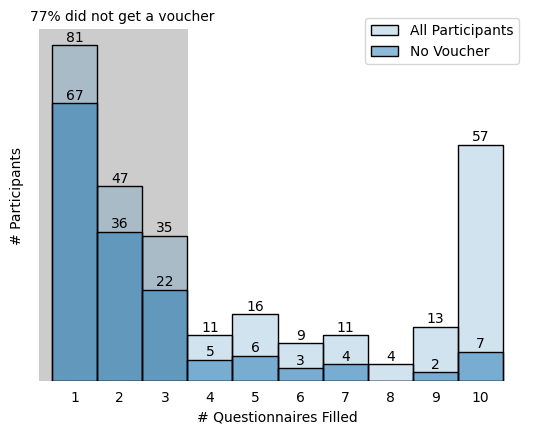

In [36]:
# add people with no vouchers from questionnaire on top
fig, ax = plt.subplots()
g1 = sns.histplot(data=count_questionnaire_id, ax=ax, bins=10, discrete=True,
 label="All Participants", color="#1f77b4", alpha=.2)
g2 = sns.histplot(data=count_questionnaire_no_voucher, ax=ax, bins=10, discrete=True
, label="No Voucher", color="#1f77b4", alpha=.5)
ax.set_xticks(np.arange(1,11))
ax.set_xlabel("# Questionnaires Filled")
ax.set_ylabel("# Participants")
for side in ['top','right','bottom','left']:
    ax.spines[side].set_visible(False)
ax.tick_params(axis='both', labelleft=False, bottom=False, left=False)
## to do: add them to the top of the plot
for rectangle in g2.patches:
    if rectangle.get_height() > 0:
        plt.text(rectangle.get_x()+.5, rectangle.get_height()+1, f"{rectangle.get_height()}",
        ha="center")
ax.legend()
# # change alpha for remaining bars to reduce their boldness
# for rectangle in g2.patches:
#     # print(rectangle.get_xy())
#     if rectangle.get_xy()[0] >= 3.5:
#         rectangle.set_facecolor((0, 0, 0, 0.3))
# add a rectangle to the back
ax.axhspan(ymin=0, ymax=85, xmin=.02, xmax=.32, zorder=0, fc="black", alpha=.2)
# count how many people did not get voucher after filling 3 or less questionnaires
count_3_or_less_no_voucher = len(count_questionnaire_no_voucher[
                                 count_questionnaire_no_voucher <= 3].index)
count_3_or_less = len(count_questionnaire_id[
                     count_questionnaire_id <= 3].index)
ax.text(x=0, y=87, s=f"{count_3_or_less_no_voucher/count_3_or_less*100 :.0f}% did not get a voucher")

plt.show()

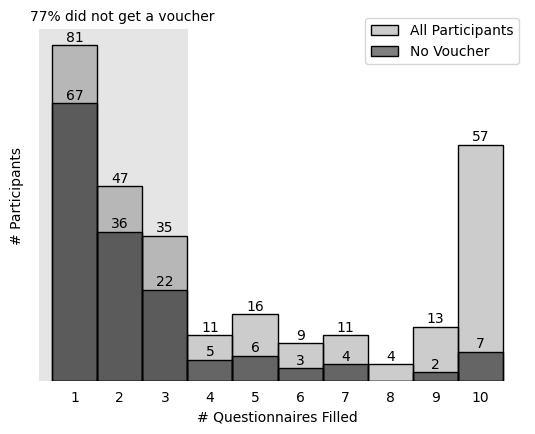

In [37]:
# add people with no vouchers from questionnaire on top
fig, ax = plt.subplots()
g1 = sns.histplot(data=count_questionnaire_id, ax=ax, bins=10, discrete=True,
 label="All Participants", color="black", alpha=.2)
g2 = sns.histplot(data=count_questionnaire_no_voucher, ax=ax, bins=10, discrete=True
, label="No Voucher", color="black", alpha=.5)
ax.set_xticks(np.arange(1,11))
ax.set_xlabel("# Questionnaires Filled")
ax.set_ylabel("# Participants")
for side in ['top','right','bottom','left']:
    ax.spines[side].set_visible(False)
ax.tick_params(axis='both', labelleft=False, bottom=False, left=False)
## to do: add them to the top of the plot
for rectangle in g2.patches:
    if rectangle.get_height() > 0:
        plt.text(rectangle.get_x()+.5, rectangle.get_height()+1, f"{rectangle.get_height()}",
        ha="center")
ax.legend()
# # change alpha for remaining bars to reduce their boldness
# for rectangle in g2.patches:
#     # print(rectangle.get_xy())
#     if rectangle.get_xy()[0] >= 3.5:
#         rectangle.set_facecolor((0, 0, 0, 0.3))
# add a rectangle to the back
ax.axhspan(ymin=0, ymax=85, xmin=.02, xmax=.32, zorder=0, fc="black", alpha=.1)
# count how many people did not get voucher after filling 3 or less questionnaires
count_3_or_less_no_voucher = len(count_questionnaire_no_voucher[
                                 count_questionnaire_no_voucher <= 3].index)
count_3_or_less = len(count_questionnaire_id[
                     count_questionnaire_id <= 3].index)
ax.text(x=0, y=87, s=f"{count_3_or_less_no_voucher/count_3_or_less*100 :.0f}% did not get a voucher")

plt.show()

Most people gave up after trying a couple of questionnaires and not getting a voucher. But from the remaining people, most of them tried all 10 questionnaires.
Let's see if the ones who did not get a voucher, got any offline vouchers.

In [38]:
df_transactions = tables["points_usertransaction"]
user_no_voucher_q_but_trans = df_transactions[df_transactions["user_id"].\
    isin(user_id_no_voucher_q)]["user_id"].unique()
len(user_no_voucher_q_but_trans)

25

Only 25 of them got offline vouchers. Let's see how many tries they had given on questionnaires!

<Axes: >

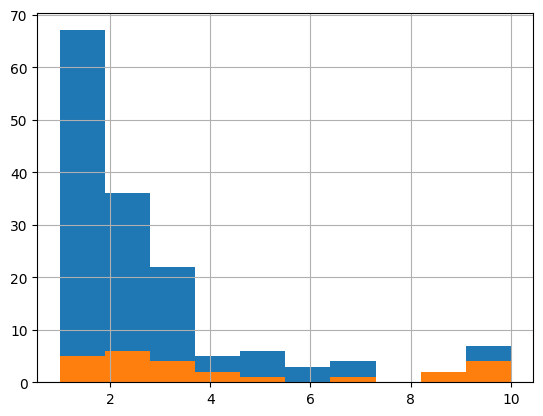

In [39]:
count_questionnaire_no_voucher.hist()
count_questionnaire_no_voucher[user_no_voucher_q_but_trans].hist()

In comparison to the others, they seem to be more eager. What was their personas?

In [40]:
df_persona = tables["profiles_userpersona"]
# limit the participants by the time they have signed up
# this way, we don't count people who couldn't participate in the fair
df_persona = df_persona[df_persona["created_dt"] <= dt_intervals[-1]]
# add persona labels 
df_persona = df_persona.merge(tables["profiles_persona"],
 left_on="persona_id", right_on="id")
users_gritty = df_persona[df_persona["user_id"].isin(user_no_voucher_q_but_trans)]["title"] \
    .value_counts().to_dict()
users_gritty

{'explorer': 15, 'socializer': 9, 'achiever': 1}

Given that most probably, people could not be in leaderboard if they did not have any vouchers from questionnaire, the personas seem feasible. Let's see the normalized distribution of these gritty users.

In [41]:
users_active = set(df_q_result["user_id"].unique()).union(df_transactions["user_id"].unique())
count_personas_active = df_persona[df_persona["user_id"].isin(users_active)]["title"] \
.value_counts().to_dict()

# calculate the normalized value of gritty s
{persona: (users_gritty[persona] / count_personas_active[persona])*100 for persona in users_gritty}

{'explorer': 10.714285714285714,
 'socializer': 8.411214953271028,
 'achiever': 5.0}

So ~9 percent of explorers and socializers continued on getting vouchers after not getting any by questionnaire, vs 5% for achievers and non for finishers!

## Relating questionnaire vouchers and other vouchers in transactions

Did every voucher got by filling questionnaire appeared in transactions?

In [42]:
# merge multiple tables!
df = tables["points_usertransaction"].merge(
    tables["points_uservouchermission"],
    left_on="uvm_id", right_on="id"
    )
cols_to_use = ["created_dt_x", "amount", "user_id_x", "voucher_mission_id"]
df = df[cols_to_use]
df = df.rename(columns={
    "created_dt_x": "created_dt",
    "user_id_x": "user_id"})
# we have some vouchers which did not show up in transactions
# that's why we use "right" merge here; but there are also a lot of 
# vouchers which were not used at all. We will get rid of them later
df = df.merge(tables["points_voucher"][tables["points_voucher"]["created_dt"] < dt_intervals[-1]],
   how="right", left_on="voucher_mission_id", right_on="id")
cols_to_use = ["created_dt_x", "score", "user_id", "value", "typ_id"]
df = df[cols_to_use]
df = df.rename(columns={
    "created_dt_x": "created_dt",
    "typ_id": "voucher_type_id"})
# there were vouchers given on-site, not related to filling questionnaire
# we use "left" merge to keep them
df = df.merge(
    tables["questionnaire_questionnaireuserresult"].dropna(subset=["voucher"]),
    how="left", left_on="value", right_on="voucher")
cols_to_use = ["created_dt_x", "created_dt_y", "user_id_x", "user_id_y", "score_x", "value", "voucher_type_id", "questionnaire_id"]
df = df[cols_to_use]
# we have two user_id. One is used in transactions, one in questionnaire; later they
# will be used to identify bugs
df = df.rename(columns={
    "created_dt_x": "created_dt_transaction",
    "created_dt_y": "created_dt_questionnaire",
    "score_x": "score",
    "user_id_x": "user_id_transaction",
    "user_id_y": "user_id_questionnaire"})
# df is very large because of unused vouchers. Let's clean unused ones
df.dropna(subset=["user_id_transaction", "user_id_questionnaire"], how="all", inplace=True)
# make df look nicer
df.sort_values(by="created_dt_questionnaire", inplace=True)
df["hour_transaction"] = pd.DatetimeIndex(df["created_dt_transaction"]).hour
df["hour_questionnaire"] = pd.DatetimeIndex(df["created_dt_questionnaire"]).hour
for col in ["hour_questionnaire", "hour_transaction", "score", "user_id_transaction", "user_id_questionnaire", "questionnaire_id"]:
    df[col] = df[col].astype('Int64')

# rename df to keep it in other parts
df_transactions_and_questionnaires = df

check if transactions happend out of hours

In [43]:
df[(df["hour_transaction"] >= 17) |  (df["hour_transaction"] < 9)]

,created_dt_transaction,created_dt_questionnaire,user_id_transaction,user_id_questionnaire,score,value,voucher_type_id,questionnaire_id,hour_transaction,hour_questionnaire
1016,2023-11-11 21:00:45.096019+03:30,2023-11-11 21:00:33.389493+03:30,20,20,50,95HCY8LATZ,13,3,21,21
1017,2023-11-12 00:03:47.456293+03:30,2023-11-12 00:03:43.182886+03:30,22,22,50,ET4PGCP2L3,14,2,0,0
1018,2023-11-12 02:19:35.336303+03:30,2023-11-12 02:19:11.438192+03:30,20,20,50,TKFR47L34Q,14,2,2,2
1019,2023-11-12 02:24:22.115742+03:30,2023-11-12 02:23:46.519157+03:30,20,20,50,I6AD8S9NI0,15,5,2,2
598,2023-11-14 17:23:14.998784+03:30,NaT,103,<NA>,30,UFWH9XQQB2,2,<NA>,17,<NA>


Case 20 and 22 seems to be test cases anyway; because they did things before start of the fair. Let's remove them from further analysis.

In [44]:
for id in [20, 22]:
    df = df[(df["user_id_questionnaire"] != id) | (df["user_id_transaction"] != id)]


Now, let's check if all questionnaire filling resulted to a transaction or not!

In [45]:
df_no_transaction = df[df["user_id_transaction"].isna()]
df_no_transaction

,created_dt_transaction,created_dt_questionnaire,user_id_transaction,user_id_questionnaire,score,value,voucher_type_id,questionnaire_id,hour_transaction,hour_questionnaire
1133,NaT,2023-11-12 17:06:24.002578+03:30,<NA>,161,50,5LKEIKO9ZK,18,4,<NA>,17
1134,NaT,2023-11-12 19:45:34.282540+03:30,<NA>,180,50,88FET8OGZ6,14,2,<NA>,19
1135,NaT,2023-11-12 20:59:25.048904+03:30,<NA>,53,50,6BP58XMI75,14,2,<NA>,20
1138,NaT,2023-11-12 22:48:59.572858+03:30,<NA>,197,50,0E5JBD0KHP,13,3,<NA>,22
1268,NaT,2023-11-13 16:56:00.292336+03:30,<NA>,269,50,TM2PYVJAAE,20,8,<NA>,16
1269,NaT,2023-11-13 16:57:56.055021+03:30,<NA>,200,50,MYGO6QO7KE,22,10,<NA>,16
1270,NaT,2023-11-13 16:59:51.677355+03:30,<NA>,343,50,7CAIOO3QC1,18,4,<NA>,16
1272,NaT,2023-11-13 17:07:45.192526+03:30,<NA>,349,50,V01PZ269NF,14,2,<NA>,17
1274,NaT,2023-11-13 21:02:54.534737+03:30,<NA>,386,50,IXJX6HV8HM,14,2,<NA>,21
1275,NaT,2023-11-13 21:19:42.437056+03:30,<NA>,385,50,IOKZLWIVZE,14,2,<NA>,21


It seems like there were multiple cases where questionnaire filling was inside working hours, but the transactions did not happen. Thier ids were:

In [46]:
ids_no_transaction = (df_no_transaction[
    (df_no_transaction["hour_questionnaire"] <= 17) & 
    (df_no_transaction["hour_questionnaire"] >= 9)]["user_id_questionnaire"].unique())
sorted(ids_no_transaction)

[70, 161, 200, 269, 343, 349, 431, 590]

It is likely that they did not redeem their vouchers themselve.

to do:
check their personas

In [47]:
# did they have any transaction shown?
for id in ids_no_transaction:
    df_id = df[df["user_id_transaction"] == id]
    print(f"id {id} has {len(df_id)} transaction(s)")

id 161 has 1 transaction(s)
id 269 has 7 transaction(s)
id 200 has 7 transaction(s)
id 343 has 15 transaction(s)
id 349 has 3 transaction(s)
id 70 has 0 transaction(s)
id 431 has 0 transaction(s)
id 590 has 1 transaction(s)


Now let's check if all out-of-hours questionnaire filling did not get a score!

In [48]:
df[((df["hour_questionnaire"] > 17) | (df["hour_questionnaire"] < 9)) & (~df["user_id_transaction"].isna())]

,created_dt_transaction,created_dt_questionnaire,user_id_transaction,user_id_questionnaire,score,value,voucher_type_id,questionnaire_id,hour_transaction,hour_questionnaire
1136,2023-11-13 13:16:45.325782+03:30,2023-11-12 22:18:51.024618+03:30,150,150,50,XH10XGZ39L,13,3,13,22
1137,2023-11-13 13:17:17.772764+03:30,2023-11-12 22:44:55.174818+03:30,150,150,50,IT52SYKT66,18,4,13,22
1139,2023-11-13 10:52:56.806652+03:30,2023-11-12 23:47:23.109661+03:30,200,200,50,4YK3CSKMPQ,14,2,10,23
1273,2023-11-14 10:47:53.380676+03:30,2023-11-13 18:02:37.350798+03:30,362,362,50,U1DYCUJOCN,14,2,10,18


It only scored for some cases. Let's check if these ids have any other transactions on working hour time.

In [49]:
ids = list(df[((df["hour_questionnaire"] > 17) | (df["hour_questionnaire"] < 9)) & (~df["user_id_transaction"].isna())]["user_id_questionnaire"].unique())
for id in ids:
    df_id = df[(df["user_id_transaction"] == id) & (9 <= df["hour_questionnaire"]) & (df["hour_questionnaire"] <= 17)]
    print(f'user_id: {id}; Number of other transactions: {len(df_id)}')

user_id: 150; Number of other transactions: 5
user_id: 200; Number of other transactions: 6
user_id: 362; Number of other transactions: 8


It seems like when people have done other in-hours transactions, their questionnaire filling score also counted.
But what about the ones who haven't done any in-hours transactions?

In [50]:
ids_transactions = df[~df["user_id_transaction"].isna()]["user_id_transaction"].unique()
for id in df_no_transaction["user_id_questionnaire"].unique():
    df_id = df[df["user_id_questionnaire"] == id]
    if ((df_id["hour_questionnaire"] > 17) | (df_id["hour_questionnaire"] < 9)).all():
        # check if they have any transactions at all
        print(f"user id: {id}; has transactions: {id in ids_transactions}")
        

user id: 180; has transactions: False
user id: 53; has transactions: False
user id: 197; has transactions: False
user id: 386; has transactions: False
user id: 385; has transactions: False
user id: 303; has transactions: False
user id: 409; has transactions: False
user id: 415; has transactions: False
user id: 420; has transactions: False


None of their transactions showed up!!!

## drop outs
Some people have signed up, but only a few of them scored! Let's see the trends

In [51]:
df = tables["profiles_userpersona"]
print(f'Number of sign ups: {len(df["user_id"])}')
# limit the participants by the time they have signed up
# this way, we don't count people who couldn't participate in the fair
df = df[df["created_dt"] <= dt_intervals[-1]]
signed_ups_count = len(df["user_id"])
print(f'Number of on-time sign ups: {signed_ups_count}')
# let's check how many people have tried any kind of scoring
# first the questionnaires
df = tables["questionnaire_questionnaireuserresult"]
df = df[df["created_dt"] < dt_intervals[-1]] 
questionnaire_filling_ids = df["user_id"].unique()
# balance unique users
balance_ids = tables["points_userbalance"]["user_id"].unique()
# mix them up
attempt_ids = set(questionnaire_filling_ids).union(balance_ids)
attempt_count = len(set(questionnaire_filling_ids).union(set(balance_ids)))
print(f'Number of users attempted to score: \
{attempt_count}')
print(f'Number of pepople who have scored: {len(balance_ids)}')

Number of sign ups: 703
Number of on-time sign ups: 662
Number of users attempted to score: 307
Number of pepople who have scored: 169


## User engagment

In addition, we can think of engaged users. Let's take a look at the histogram of number of questionnaire people gave a try and the histogram of number of questionnaires for people who did not get any voucher from questionnaires.


<Axes: >

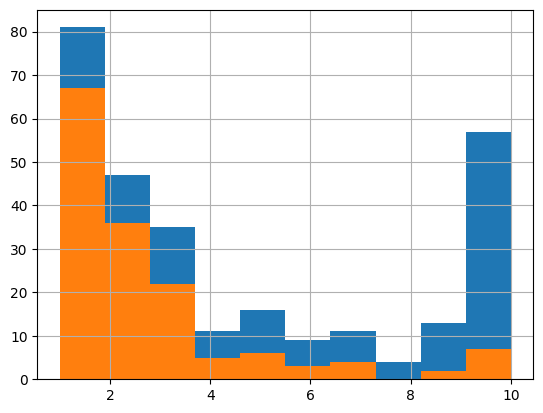

In [52]:
count_questionnaire_id.hist()
count_questionnaire_no_voucher.hist()

It seems more than 50% of the people who have done less than 4 questionnaire, did not get any voucher and probably did not continue to get any score. 


Since anyone who had put time could get a voucher, my suggestion is to call people who had at 1 transaction, engaged users. Let's extract their ids:

In [53]:
engaged_user_ids = tables["points_userbalance"]["user_id"].to_list()
len(engaged_user_ids)

169

Get an idea of the engagement ratios, compared to signed ups and people who attempted to score.

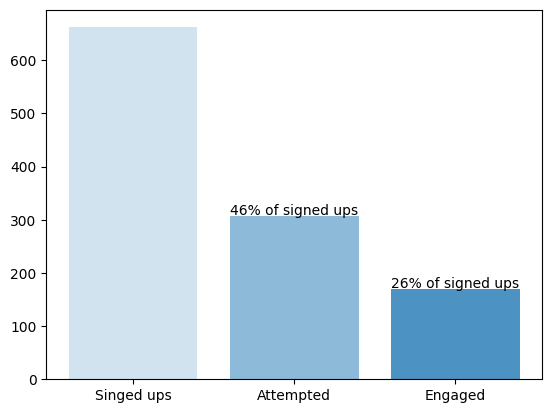

In [54]:
to_plot = [("Singed ups", signed_ups_count),
            ("Attempted", attempt_count),
            ("Engaged", len(engaged_user_ids))]
tick_label = []
for x in range(3):
    plt.bar(x, to_plot[x][1], alpha=.2+x*.3, color='tab:blue')
    tick_label.append(to_plot[x][0])
    # add percentages compared to the signed-ups; add only for the second and third bar
    if x > 0:
        plt.text(x, y=to_plot[x][1]+3, s=f"{to_plot[x][1]/to_plot[0][1]*100:.0f}% of signed ups",
            horizontalalignment='center')
plt.xticks(np.arange(3), tick_label)
plt.show()

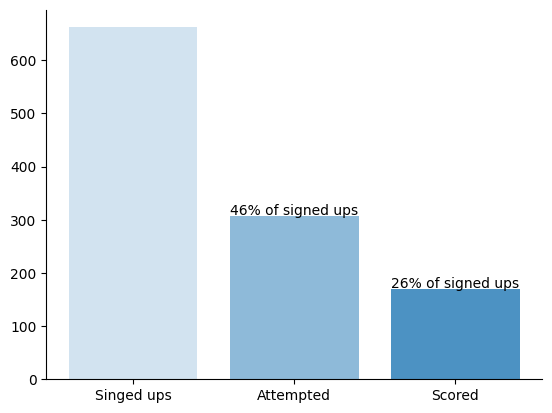

In [55]:
# plot another one with the ones who were in balance
to_plot = [("Singed ups", signed_ups_count),
            ("Attempted", attempt_count),
            ("Scored", len(balance_ids))]
tick_label = []
ax = plt.subplot()
for x in range(3):
    ax.bar(x, to_plot[x][1], alpha=.2+x*.3, color='tab:blue')
    tick_label.append(to_plot[x][0])
    # add percentages compared to the signed-ups; add only for the second and third bar
    if x > 0:
        plt.text(x, y=to_plot[x][1]+3, s=f"{to_plot[x][1]/to_plot[0][1]*100:.0f}% of signed ups",
            horizontalalignment='center')
ax.set_xticks(np.arange(3), tick_label)
# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)
plt.show()

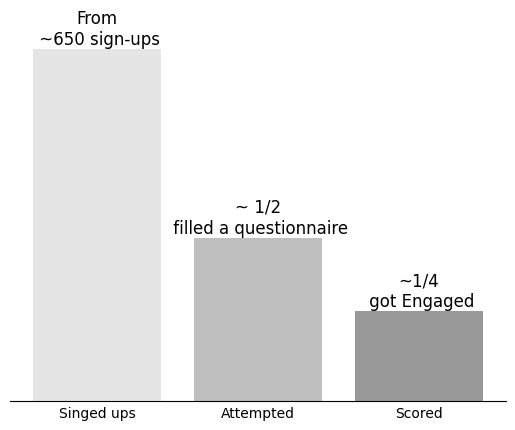

In [56]:
# another version could be
to_plot = [("Singed ups", signed_ups_count),
            ("Attempted", attempt_count),
            ("Scored", len(balance_ids))]
tick_label = []
ax = plt.subplot()
for x in range(3):
    ax.bar(x, to_plot[x][1], alpha=.2+x*.3, color='gray')
    tick_label.append(to_plot[x][0])
    # add percentages compared to the signed-ups; add only for the second and third bar
    if x == 0:
        plt.text(x, y=to_plot[x][1]+10, s=f"From\n ~650 sign-ups",
            horizontalalignment='center', size="large")
    elif x == 1:
        plt.text(x, y=to_plot[x][1]+10, s=f"~ 1/2\n filled a questionnaire",
            horizontalalignment='center', size="large")
    else:
        plt.text(x, y=to_plot[x][1]+10, s=f"~1/4\n got Engaged",
            horizontalalignment='center', size="large")
ax.set_xticks(np.arange(3), tick_label)
# Hide the right, left and top spines
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.set_yticklabels([])
ax.set_yticks([])
ax.tick_params(axis='x', length=0)
plt.show()

Engaged ones came down to 133 people. Let's match them with their personas and see their distribution.

In [57]:
count_personas_engaged = df_persona[df_persona["user_id"].isin(engaged_user_ids)]["title"] \
                        .value_counts().to_dict()
count_personas_engaged

{'explorer': 74, 'socializer': 63, 'finisher': 20, 'achiever': 12}

My guess is that people were mostly active for one day . Or even if they are active, they do their bulk of activity in only 1 day because of accumulation of scores. Let's see if that's true. My threshold for bulk of activity was 90%. 

In [58]:
df_transactions = df_transactions[df_transactions["created_dt"] > '2023-11-12 9:00:00']
df_transactions["day"] = pd.DatetimeIndex(df_transactions["created_dt"]).day
count_user_multi_trans = 0
count_user_multi_day = 0 
count_user_multi_day_least_90 = 0
for user in df_transactions["user_id"].unique():
    df_user = df_transactions[df_transactions["user_id"] == user]
    # check if they have more than 1 transactions
    if len(df_user) > 1:
        count_user_multi_trans += 1
    if df_user["day"].nunique() > 1:
        count_user_multi_day += 1
        # also count percentage of activity in different days
        count_activity = df_user.groupby("day")["id"].count().to_list()
        # sort based on max activity
        count_activity.sort(reverse=True)
        activity_percentage = count_activity[0] / sum(count_activity) * 100
        if activity_percentage <= 90:
            count_user_multi_day_least_90 += 1



print(f"{(1 - count_user_multi_day_least_90/count_user_multi_trans)*100 :.0f}% \
of participants who had at least two transactions did more than 90% of their\
transactions in a single day.")

96% of participants who had at least two transactions did more than 90% of theirtransactions in a single day.


/tmp/ipykernel_6330/1544502213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions["day"] = pd.DatetimeIndex(df_transactions["created_dt"]).day


## Persona Trends

Let's see the distribution of persona labels among singed up participants and thier trends of drop outs.

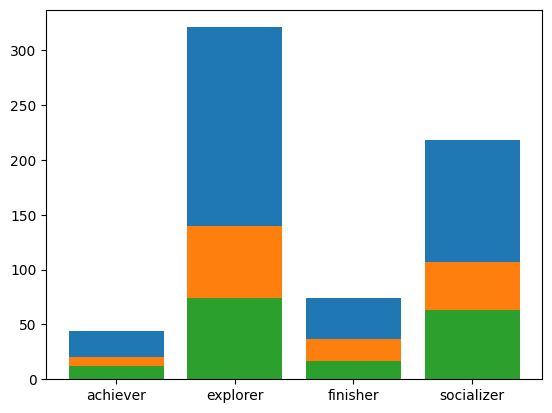

In [59]:
df = tables["profiles_userpersona"]
# limit the participants by the time they have signed up
# this way, we don't count people who couldn't participate in the fair or test ids
df = df[(df["created_dt"] <= dt_intervals[-1]) &
        (df["created_dt"] > '2023-11-12 9:00:00')]
# add persona labels 
df = df.merge(tables["profiles_persona"],
 left_on="persona_id", right_on="id")
count_personas_sign_up = df.groupby("title")["title"].count()
plt.bar(count_personas_sign_up.index.to_list(), count_personas_sign_up.to_list())
count_personas_attempt = df[df["user_id"].isin(attempt_ids)].groupby("title")["title"].count()
plt.bar(count_personas_attempt.index.to_list(), count_personas_attempt.to_list())
count_personas_engaged = df[df["user_id"].isin(engaged_user_ids)].groupby("title")["title"].count()
plt.bar(count_personas_engaged.index.to_list(), count_personas_engaged.to_list())
plt.show()


Let's check percentages of drop outs or being engaged among personas.

In [60]:
for persona in count_personas_sign_up.index:
    print(f"Out of {count_personas_sign_up[persona]} signed up {persona}s\
 {count_personas_attempt[persona] / count_personas_sign_up[persona]*100 :.0f}% attempted to score,\
 and {count_personas_engaged[persona] / count_personas_sign_up[persona]*100 :.0f}% were engaged.")


Out of 44 signed up achievers 45% attempted to score, and 27% were engaged.
Out of 321 signed up explorers 44% attempted to score, and 23% were engaged.
Out of 74 signed up finishers 50% attempted to score, and 23% were engaged.
Out of 218 signed up socializers 49% attempted to score, and 29% were engaged.


I added the above results merged with leaderboard measures to the leaderboard section.

check hourly participation for each persona. There are two ways, look at the number of transactions, or their scores. Let's see which one works.

In [61]:
# add two columns to df_transactions_and_questionnaires to have the right time and user id.
# if it has a questionnaire time, it's done then, if not, get the transaction time
df_transactions_and_questionnaires["dt_done"] = \
    np.where(
        ~df_transactions_and_questionnaires["created_dt_questionnaire"].isna(),
        df_transactions_and_questionnaires["created_dt_questionnaire"],
        df_transactions_and_questionnaires["created_dt_transaction"])
df_transactions_and_questionnaires["user_id"] = \
    np.where(
        ~df_transactions_and_questionnaires["user_id_questionnaire"].isna(),
        df_transactions_and_questionnaires["user_id_questionnaire"],
        df_transactions_and_questionnaires["user_id_transaction"])
# merge it with previously created df to get the user persona
df = df.merge(df_transactions_and_questionnaires, on="user_id")
cols_to_use = ["dt_done", "user_id", "score", "voucher_type_id", "title"]
df = df[cols_to_use]
df = df.rename(columns={"title": "persona"})
df["hour"] = pd.DatetimeIndex(df["dt_done"]).hour
df["day"] = pd.DatetimeIndex(df["dt_done"]).day
df.head()

,dt_done,user_id,score,voucher_type_id,persona,hour,day
0,2023-11-12 11:35:20.965776+03:30,35,50,14,socializer,11,12
1,2023-11-12 11:41:42.486760+03:30,35,50,13,socializer,11,12
2,2023-11-12 11:28:02.752028+03:30,37,50,13,socializer,11,12
3,2023-11-12 11:35:20.609129+03:30,37,50,17,socializer,11,12
4,2023-11-12 11:43:15.107626+03:30,37,50,16,socializer,11,12


<Axes: xlabel='hour', ylabel='count_transactions'>

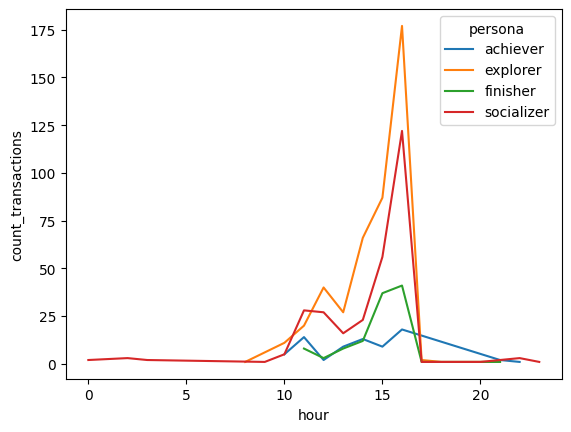

In [62]:
count_transaction_persona_hourly = df.groupby(["persona", "hour"])["dt_done"] \
                                    .count().reset_index()
count_transaction_persona_hourly = count_transaction_persona_hourly.rename(
                                        columns={"dt_done": "count_transactions"})
sns.lineplot(data=count_transaction_persona_hourly,
            x="hour",
            y="count_transactions",
            hue="persona")

since the plot doesn't take into account the differnces in group size, let's add weights based on group size for scores gained.

<Axes: xlabel='hour', ylabel='normalized_count'>

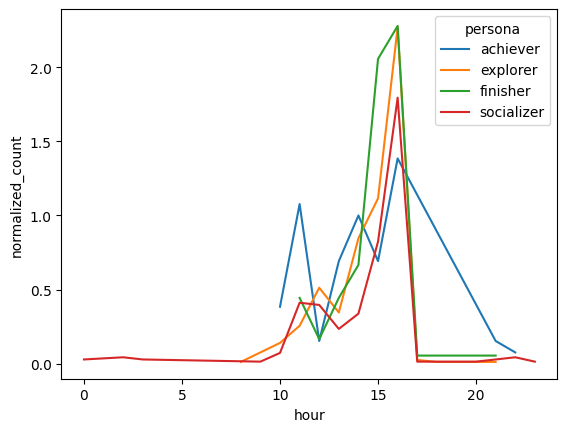

In [63]:
# count active users persona-wise
count_persona = \
    df.groupby(["persona"]).agg({"user_id": "nunique"}).reset_index()
# create a function for mapping active users for each persona
def active_persona(row):
    return count_persona[ 
        (count_persona["persona"] == row["persona"])]["user_id"].to_list()[0]


count_transaction_persona_hourly["group_size"] = \
    count_transaction_persona_hourly. \
    apply(active_persona, axis=1)
count_transaction_persona_hourly["normalized_count"] = \
    (count_transaction_persona_hourly["count_transactions"] /
    count_transaction_persona_hourly["group_size"])

sns.lineplot(data=count_transaction_persona_hourly,
            x="hour",
            y="normalized_count",
            hue="persona")

apply the same thing to scores gained

<Axes: xlabel='hour', ylabel='normalized_score'>

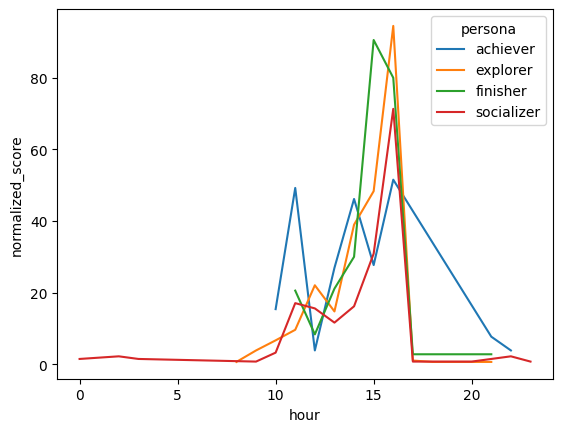

In [64]:
sum_score_persona_hourly = df.groupby(["persona", "hour"])["score"] \
                                    .sum().reset_index()

sum_score_persona_hourly["group_size"] = sum_score_persona_hourly. \
    apply(active_persona, axis=1)
sum_score_persona_hourly["normalized_score"] = (sum_score_persona_hourly["score"] /
                                                sum_score_persona_hourly["group_size"])

sns.lineplot(data=sum_score_persona_hourly,
            x="hour",
            y="normalized_score",
            hue="persona")

It seems like the trend is consistant for all personas except for "achiever"s. Let's see if the trend changes daily

<Axes: xlabel='hour', ylabel='normalized_score'>

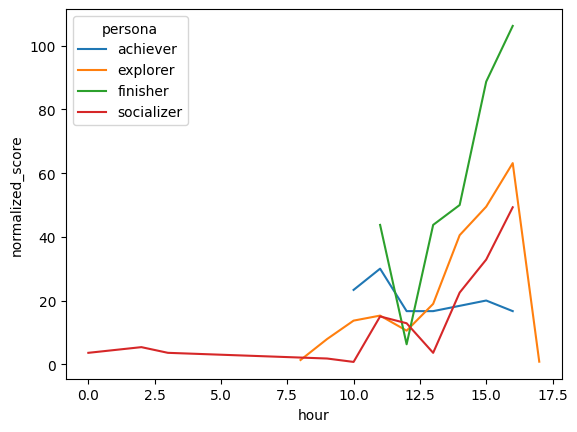

In [65]:
sum_score_persona_day_hourly = df.groupby(["persona", "day", "hour"])["score"] \
                                    .sum().reset_index()
# count active users persona-wise daily
count_persona_daily = \
    df.groupby(["day", "persona"]).agg({"user_id": "nunique"}).reset_index()
# create a function for mapping daily active users for each persona
def active_persona_daily(row):
    return count_persona_daily[
        (count_persona_daily["day"] == row["day"]) & 
        (count_persona_daily["persona"] == row["persona"])]["user_id"].to_list()[0]

sum_score_persona_day_hourly["group_size"] = \
    sum_score_persona_day_hourly. \
    apply(active_persona_daily, axis=1)
sum_score_persona_day_hourly["normalized_score"] = (sum_score_persona_day_hourly["score"] /
                                                sum_score_persona_day_hourly["group_size"])
sum_score_persona_day_hourly

### to do: plot each day side by side
sns.lineplot(data=sum_score_persona_day_hourly[sum_score_persona_day_hourly["day"] == 14],
            x="hour",
            y="normalized_score",
            hue="persona")

Nothing that helpful. I guess we can see the trends better if we restrict it to the leaderboard users.

Another idea is to check when made engaged people remain engaged? Did they start offline or online? Can it be related to their persona?


In [66]:
# add user persona
df_transactions_and_questionnaires = df_transactions_and_questionnaires.merge(
                        df_persona[["user_id", "title"]],
                        on="user_id")
# add a column for offline vouchers
df_transactions_and_questionnaires["offline"] = False
df_transactions_and_questionnaires["offline"] = df_transactions_and_questionnaires["voucher_type_id"] < 5

In [67]:
# sort by time done, pick the first activity of each user and group by
# their persona and type of activity

df_transactions_and_questionnaires.sort_values(["user_id", "dt_done"])\
    .groupby("user_id").first().groupby(["title", "offline"])["dt_done"].count()

title       offline
achiever    False       6
            True        7
explorer    False      34
            True       44
finisher    False      14
            True        7
socializer  False      38
            True       30
Name: dt_done, dtype: int64

It doesn't seem to be a trend for persona. Let's check only the participants who had at least 2 transactions. Since the numbers above is also for people who did not have any transactions or the one who had one transaction and did not continue.

In [68]:
# identify users who had at least 2 transactions
count_trans = df_transactions.groupby("user_id")["created_dt"].count()
user_more_2_trans = count_trans[count_trans > 2].index.to_list()
df_transactions_and_questionnaires[df_transactions_and_questionnaires["user_id"].isin(user_more_2_trans)]\
    .sort_values(["user_id", "dt_done"])\
    .groupby("user_id").first().groupby(["title", "offline"])["dt_done"].count()

title       offline
achiever    False       3
            True        3
explorer    False      17
            True       24
finisher    False       6
            True        4
socializer  False      16
            True       13
Name: dt_done, dtype: int64

Again, the ratio of offline to online transaction does not seem to say much about participant's persona.

Add a plot for hourly scores persona-wise among engaged users.

In [69]:
df = df_transactions_and_questionnaires[
    ~df_transactions_and_questionnaires["created_dt_transaction"].isna()]
cols_to_use = ["created_dt_transaction", "user_id", "score", "voucher_type_id", "title"]
df = df[cols_to_use]
df = df.rename(columns={"title": "persona",
                        "created_dt_transaction": "created_dt"})
df["hour"] = pd.DatetimeIndex(df["created_dt"]).hour
# remove test transaction out of hours
df = df[(df["hour"] >= 9) &  (df["hour"] <= 16)]
# limit it to engaged users
df = df[df["user_id"].isin(engaged_user_ids)]
df.columns

Index(['created_dt', 'user_id', 'score', 'voucher_type_id', 'persona', 'hour'], dtype='object')

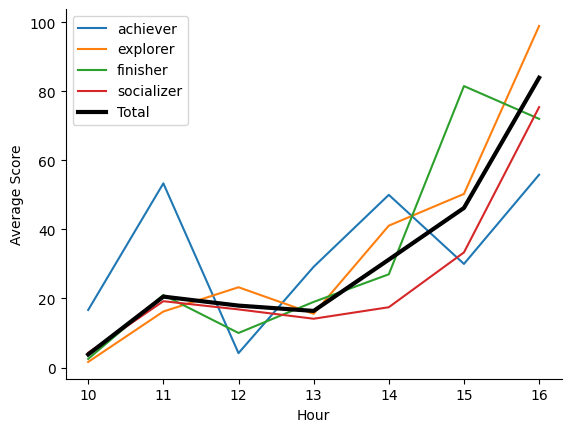

In [70]:
count_personas_engaged = df_persona[df_persona["user_id"].isin(engaged_user_ids)]["title"] \
                        .value_counts().reset_index()
# create a function for mapping engaged users for each persona
def engaged_persona(row):
    return count_personas_engaged[ 
        (count_personas_engaged["title"] == row["persona"])]["count"].to_list()[0]

sum_score_persona_hourly = df.groupby(["persona", "hour"])["score"] \
                                    .sum().reset_index()

sum_score_persona_hourly["group_size"] = sum_score_persona_hourly. \
    apply(engaged_persona, axis=1)
sum_score_persona_hourly["normalized_score"] = (sum_score_persona_hourly["score"] /
                                                sum_score_persona_hourly["group_size"])

ax = plt.subplot()
sns.lineplot(data=sum_score_persona_hourly,
            x="hour",
            y="normalized_score",
            hue="persona",
            ax=ax)
# add a line plot for average total score
# first calculate total score gained and normalize it to the number of engaged users
total_score = sum_score_persona_hourly.groupby(["hour"])["score"].sum().reset_index()
total_score["average"] = total_score["score"] / len(engaged_user_ids)
ax.plot(total_score["hour"], total_score["average"], 'black', linewidth=3, label='Total')
# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel("Hour")
ax.set_ylabel("Average Score")
plt.legend()
plt.show()


In [71]:
total_score = sum_score_persona_hourly.groupby(["hour"])["score"].sum().reset_index()
total_score["average"] = total_score["score"] / len(engaged_user_ids)

In [72]:
total_score

,hour,score,average
0,10,640,3.786982
1,11,3470,20.532544
2,12,3030,17.928994
3,13,2770,16.390533
4,14,5280,31.242604
5,15,7810,46.213018
6,16,14180,83.905325


In [73]:
count_personas_engaged = df_persona[df_persona["user_id"].isin(engaged_user_ids)]["title"] \
                        .value_counts().reset_index()
count_personas_engaged

,title,count
0,explorer,74
1,socializer,63
2,finisher,20
3,achiever,12


In [74]:
count_personas_active = df_persona[df_persona["user_id"].isin(engaged_user_ids)]["title"] \
                        .value_counts().reset_index()
count_personas_engaged

,title,count
0,explorer,74
1,socializer,63
2,finisher,20
3,achiever,12


### Questionnoaire-filling trend

My guess was that people would tackle questionnaire in order. Even if skipping some of them. Let's see if it's true.

In [75]:
df = tables["questionnaire_questionnaireuserresult"]
# df = df[df["created_dt"] < dt_intervals[-1] ]
# df.sort_values(["user_id", "created_dt"])
in_order = 0
count_more_than_one = 0
for user in df["user_id"].unique():
    filling_order = df[df["user_id"] == user]["questionnaire_id"].to_list()

    if len(filling_order) > 1:
        count_more_than_one += 1
        if all(filling_order[i] <= filling_order[i+1] for i in range(len(filling_order) - 1)):

            in_order += 1
print(f"Out of {count_more_than_one} users who filled more than one questionnaire \
{in_order} users ({in_order/count_more_than_one*100:.0f}%) did it in order.")

Out of 212 users who filled more than one questionnaire 154 users (73%) did it in order.


Also check the one who just filled one questionnaire. What was that?

In [76]:
df = tables["questionnaire_questionnaireuserresult"]

count_q = df.groupby("user_id")["created_dt"].count()
filled_1_q = count_q[count_q == 1].index.to_list() 
percentage_filling_first = sum(df[df["user_id"].isin(filled_1_q)]["questionnaire_id"] == 2) /\
     len(df[df["user_id"].isin(filled_1_q)]["questionnaire_id"])
print(f"Out of {len(df[df["user_id"].isin(filled_1_q)]["questionnaire_id"])} users who filled just one questionnaire \
{sum(df[df["user_id"].isin(filled_1_q)]["questionnaire_id"] == 2)}\
 users ({percentage_filling_first*100:.0f}%) chose the first one.")

Out of 91 users who filled just one questionnaire 86 users (95%) chose the first one.


What about everyone? Which questionnaire did they start with?

In [77]:
first_q = df.groupby(["user_id"])["questionnaire_id"].first()
sum(first_q == 2) / len(first_q)

0.933993399339934

<Axes: >

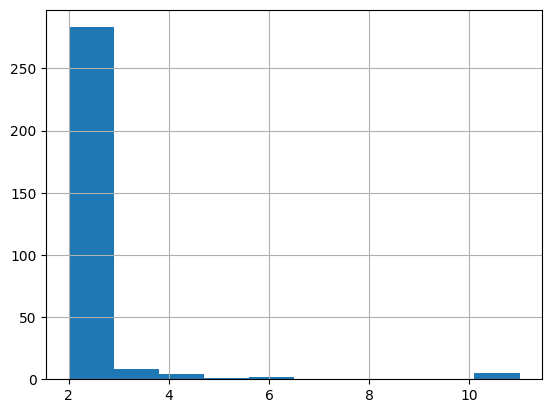

In [78]:
first_q.hist()

It could have some potentials on how to arrange the questionnaires next time (in terms of engagement, difficulty, etc.)

## Active users hourly

In [79]:
# add hour to transaction dataframe
df_transactions["hour"] = pd.DatetimeIndex(df_transactions["created_dt"]).hour
# remove the transaction after 17:00
df_transactions = df_transactions.drop(df_transactions[df_transactions["hour"] == 17].index)

/tmp/ipykernel_6330/3778333237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions["hour"] = pd.DatetimeIndex(df_transactions["created_dt"]).hour


In [80]:
# count the unique people who were active for each day and then average
count_activity_hourly = df_transactions.groupby(["day", "hour"])["user_id"].count().reset_index()\
                            .groupby("hour").mean().reset_index()

count_actives_hourly = df_transactions.groupby(["day","hour"]).agg({"user_id": "nunique"}).reset_index()\
                            .groupby("hour").mean().reset_index()
# count the unique people who were active for each day and then average
count_active_hourly_unique = df_transactions.drop_duplicates(subset=["day", "user_id"])\
                            .groupby(["day", "hour"]).agg({"user_id": "nunique"}).reset_index()\
                            .groupby("hour").mean().reset_index()
average_activity = count_activity_hourly.copy()
average_activity["user_id"] = average_activity["user_id"] / count_actives_hourly["user_id"]

<Axes: xlabel='hour', ylabel='user_id'>

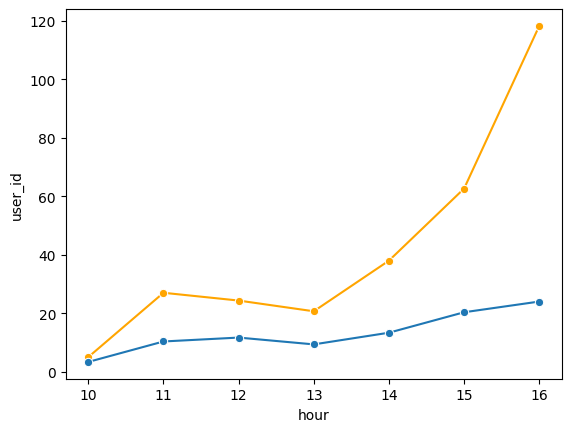

In [81]:
sns.lineplot(data=count_activity_hourly, x="hour", y="user_id", marker="o", color="orange")
sns.lineplot(data=count_actives_hourly, x="hour", y="user_id", marker="o", color="tab:blue")

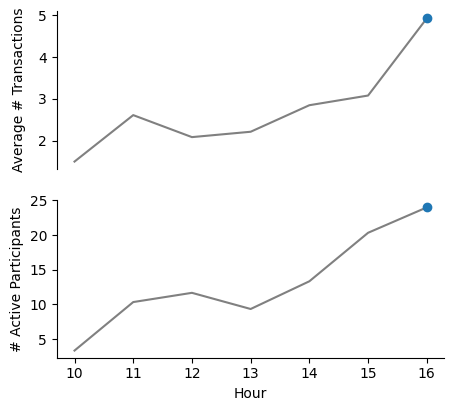

In [82]:
# try another approach  with average transactions per active user
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize = (5, 4.5))

sns.lineplot(data=average_activity, x="hour", y="user_id", ax=ax1, color="grey")
# ax1.set_xticks(list(range(10, 17)))
# ax1.set_xticklabels([1, 2, 3])
ax1.spines[['right', 'top', 'bottom']].set_visible(False)
# ax1.set_ylim([0, 17000])

ax1.set_ylabel("Average # Transactions")
ax1.yaxis.set_label_coords(-.08,.5)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)      # ticks along the bottom edge are off
# add a marker for the last hour
ax1.plot(16, average_activity[average_activity["hour"] == 16]["user_id"], marker="o", color="tab:blue")
# ax1.text(16, 1, "Highest Number of Participants\n\nHighest Average Activity\n\nIn the LAST Hour", color="tab:blue", ha="center", weight="bold")
sns.lineplot(data=count_actives_hourly, x="hour", y="user_id", ax=ax2, color="grey")
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_xlabel("Hour")
ax2.plot(16, count_actives_hourly[count_actives_hourly["hour"] == 16]["user_id"], marker="o", color="tab:blue")
# ax2.set_ylim([0, 80])
ax2.set_ylabel("# Active Participants")
plt.show()

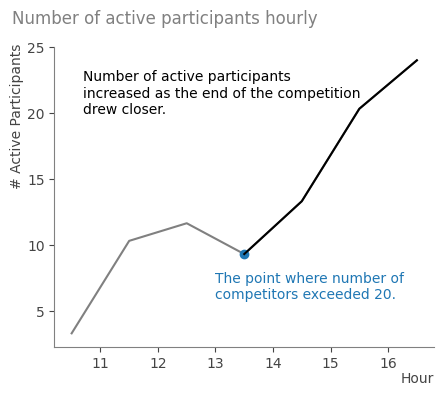

In [83]:
# keep only # actives vs hour
fig, ax = plt.subplots(figsize=(4.9, 3.9))
x = count_actives_hourly["hour"]
y = count_actives_hourly["user_id"]
sns.lineplot(x=x+.5, y=y, ax=ax, color="grey")
# mark hour 13
ax.plot(13.5, count_actives_hourly[count_actives_hourly["hour"] == 13]["user_id"],
         marker="o", color="tab:blue")

# make the line after 20 black
sns.lineplot(x=x[x >= 13]+.5,
            y=y,
            linewidth=1.5,
            color="black",
            ax=ax)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel("Hour")# ax2.set_ylim([0, 80])
ax.set_ylabel("# Active Participants")
ax.set_title("Number of active participants hourly", color="grey", x=0.29, y=1.05)
# change color of the axis and lables
ax.spines[['bottom', 'left']].set_color("grey")
ax.tick_params(axis="both", colors="#444444")
ax.yaxis.label.set_color("#444444")
ax.xaxis.label.set_color("#444444")
# set x and y label position
ax.xaxis.set_label_coords(.955,-.08)
ax.yaxis.set_label_coords(-.08,.77)
ax.text(13, 6, f"The point where number of\ncompetitors exceeded 20.",
        color="tab:blue")
ax.text(10.7, 20, 
    f"Number of active participants\nincreased as the end of the competition\ndrew closer."),
# fontsize="large")
plt.show()

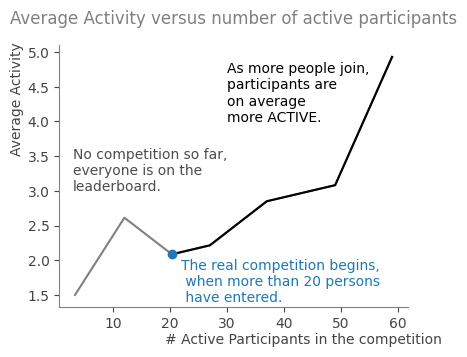

In [84]:
# show acitvity vs # of actives instead
fig, ax = plt.subplots(figsize=(4.5, 3.4))
x = np.cumsum(count_active_hourly_unique["user_id"])
y = average_activity["user_id"]
sns.lineplot(x=x,
            y=y,
            ax=ax,
            color="grey")
# make the line after 20 black
sns.lineplot(x=x[x >= 20],
            y=y,
            linewidth=1.5,
            color="black",
            ax=ax)
ax.plot(x[2], y[2], marker="o", color="tab:blue")
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel("# Active Participants in the competition")
ax.set_ylabel("Average Activity")
ax.set_title("Average Activity versus number of active participants", color="grey", x=0.5, y=1.05)
ax.text(3, 3, f"No competition so far,\neveryone is on the\nleaderboard.",
        color="black", alpha=.7),
        #  fontsize="large")
ax.text(22, 1.4, f"The real competition begins,\n when more than 20 persons\n have entered.",
        color="tab:blue"),
        # , fontsize="large")
ax.text(30, 4, f"As more people join,\nparticipants are\non average\nmore ACTIVE."),
        #  fontsize="large")
# change color of the axis and lables
ax.spines[['bottom', 'left']].set_color("grey")
ax.tick_params(axis="both", colors="#444444")
ax.yaxis.label.set_color("#444444")
ax.xaxis.label.set_color("#444444")
# set x and y label position
ax.xaxis.set_label_coords(.7,-.1)
ax.yaxis.set_label_coords(-.1,.795)
plt.show()

make a series of graphs for the live presentation

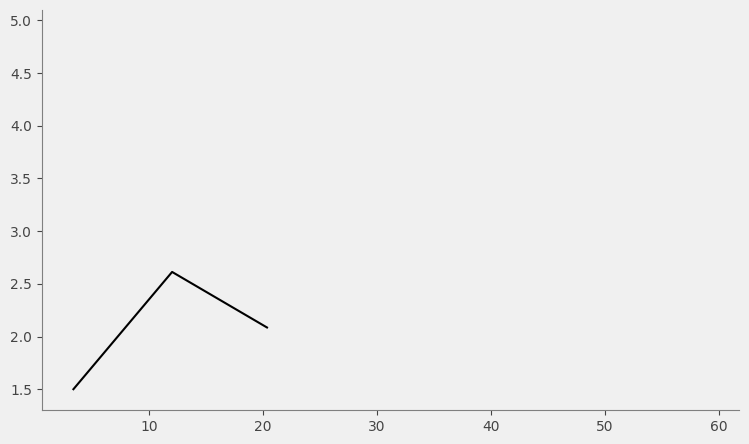

In [85]:

# show acitvity vs # of actives instead
fig, ax = plt.subplots(figsize=(9, 5.2), facecolor="#F0F0F0")
x = np.cumsum(count_active_hourly_unique["user_id"])
y = average_activity["user_id"]
sns.lineplot(x=x[x <= 21],
            y=y,
            ax=ax,
            color="black")
# # make the line after 20 black
# sns.lineplot(x=x[x >= 20],
#             y=y,
#             linewidth=1.5,
#             color="black",
#             ax=ax)
# ax.plot(x[2], y[2], marker="o", color="tab:blue")
ax.set_xlim([0.55, 61.8])
ax.set_ylim([1.3, 5.1])
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
# ax.set_xlabel("# Active Participants in the competition")
# ax.set_ylabel("Average Activity")
# ax.set_title("Average Activity versus number of active participants", color="grey", x=0.5, y=1.05)
# ax.text(3, 3, f"No competition so far,\neveryone is on the\nleaderboard.",
#         color="black", alpha=.7),
#         #  fontsize="large")
# ax.text(22, 1.4, f"The real competition begins,\n when more than 20 persons\n have entered.",
#         color="tab:blue"),
#         # , fontsize="large")
# ax.text(30, 4, f"As more people join,\nparticipants are\non average\nmore ACTIVE."),
#         #  fontsize="large")
# change color of the axis and lables
ax.spines[['bottom', 'left']].set_color("grey")
ax.tick_params(axis="both", colors="#444444")
ax.yaxis.label.set_color("#444444")
ax.xaxis.label.set_color("#444444")
# # set x and y label position
# ax.xaxis.set_label_coords(.7,-.1)
# ax.yaxis.set_label_coords(-.1,.795)
ax.set_facecolor("#F0F0F0")
plt.show()

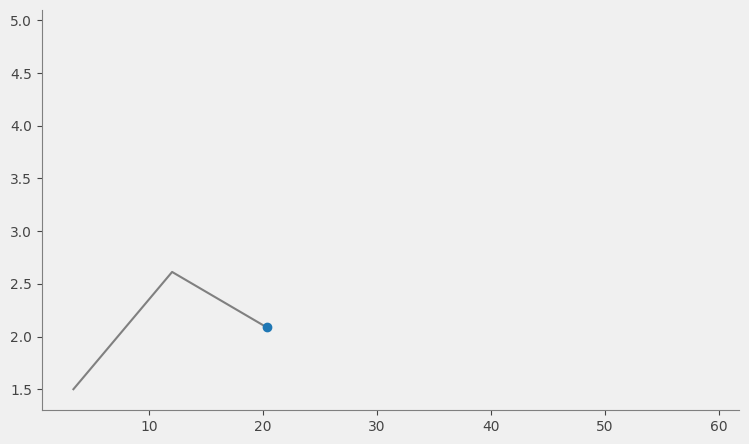

In [86]:

# show acitvity vs # of actives instead
fig, ax = plt.subplots(figsize=(9, 5.2), facecolor="#F0F0F0")
x = np.cumsum(count_active_hourly_unique["user_id"])
y = average_activity["user_id"]
sns.lineplot(x=x[x <= 21],
            y=y,
            ax=ax,
            color="grey")
# # make the line after 20 black
# sns.lineplot(x=x[x >= 20],
#             y=y,
#             linewidth=1.5,
#             color="black",
#             ax=ax)
ax.plot(x[2], y[2], marker="o", color="tab:blue")
ax.set_xlim([0.55, 61.8])
ax.set_ylim([1.3, 5.1])
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
# ax.set_xlabel("# Active Participants in the competition")
# ax.set_ylabel("Average Activity")
# ax.set_title("Average Activity versus number of active participants", color="grey", x=0.5, y=1.05)
# ax.text(3, 3, f"No competition so far,\neveryone is on the\nleaderboard.",
#         color="black", alpha=.7),
#         #  fontsize="large")
# ax.text(22, 1.4, f"The real competition begins,\n when more than 20 person\n has entered.",
#         color="tab:blue"),
#         # , fontsize="large")
# ax.text(30, 4, f"As more people join,\nparticipants are\non average\nmore ACTIVE."),
#         #  fontsize="large")
# change color of the axis and lables
ax.spines[['bottom', 'left']].set_color("grey")
ax.tick_params(axis="both", colors="#444444")
ax.yaxis.label.set_color("#444444")
ax.xaxis.label.set_color("#444444")
# # set x and y label position
# ax.xaxis.set_label_coords(.7,-.1)
# ax.yaxis.set_label_coords(-.1,.795)
ax.set_facecolor("#F0F0F0")
plt.show()

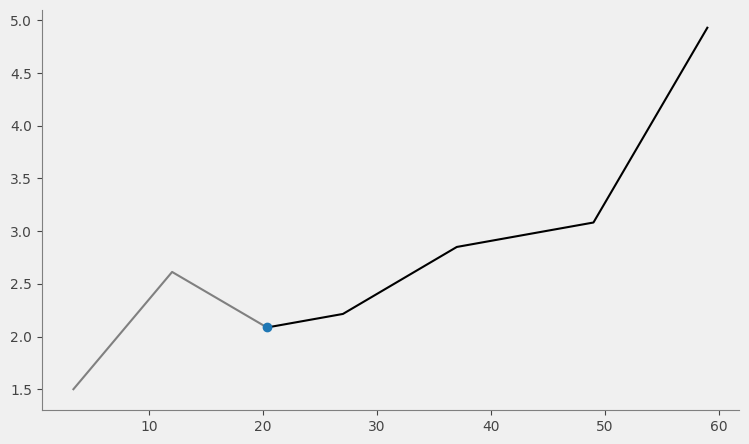

In [87]:

# show acitvity vs # of actives instead
fig, ax = plt.subplots(figsize=(9, 5.2), facecolor="#F0F0F0")
x = np.cumsum(count_active_hourly_unique["user_id"])
y = average_activity["user_id"]
sns.lineplot(x=x[x <= 21],
            y=y,
            ax=ax,
            color="grey")
# # make the line after 20 black
sns.lineplot(x=x[x > 20],
            y=y,
            linewidth=1.5,
            color="black",
            ax=ax)
ax.plot(x[2], y[2], marker="o", color="tab:blue")
ax.set_xlim([0.55, 61.8])
ax.set_ylim([1.3, 5.1])
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
# ax.set_xlabel("# Active Participants in the competition")
# ax.set_ylabel("Average Activity")
# ax.set_title("Average Activity versus number of active participants", color="grey", x=0.5, y=1.05)
# ax.text(3, 3, f"No competition so far,\neveryone is on the\nleaderboard.",
#         color="black", alpha=.7),
#         #  fontsize="large")
# ax.text(22, 1.4, f"The real competition begins,\n when more than 20 person\n has entered.",
#         color="tab:blue"),
#         # , fontsize="large")
# ax.text(30, 4, f"As more people join,\nparticipants are\non average\nmore ACTIVE."),
#         #  fontsize="large")
# change color of the axis and lables
ax.spines[['bottom', 'left']].set_color("grey")
ax.tick_params(axis="both", colors="#444444")
ax.yaxis.label.set_color("#444444")
ax.xaxis.label.set_color("#444444")
# # set x and y label position
# ax.xaxis.set_label_coords(.7,-.1)
# ax.yaxis.set_label_coords(-.1,.795)
ax.set_facecolor("#F0F0F0")
plt.show()

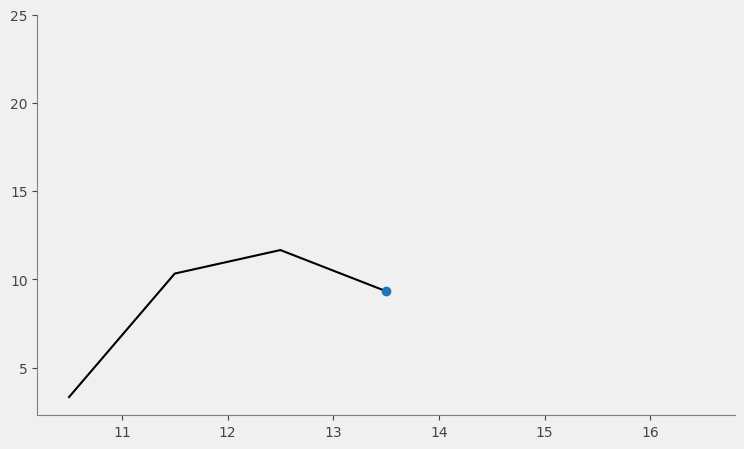

In [88]:
# keep only # actives vs hour
fig, ax = plt.subplots(figsize=(9, 5.2), facecolor="#F0F0F0")
x = count_actives_hourly["hour"]
y = count_actives_hourly["user_id"]
sns.lineplot(x=x[x <= 13]+.5, y=y, ax=ax, color="black")
# mark hour 13
ax.plot(13.5, count_actives_hourly[count_actives_hourly["hour"] == 13]["user_id"],
         marker="o", color="tab:blue")

# # make the line after 20 black
# sns.lineplot(x=x[x >= 13]+.5,
#             y=y,
#             linewidth=1.5,
#             color="black",
#             ax=ax)
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_xlim([10.2, 16.8])
ax.set_ylim([2.3, 25])
# ax.set_xlabel("Hour")# ax2.set_ylim([0, 80])
# ax.set_ylabel("# Active Participants")
# ax.set_title("Number of active participants hourly", color="grey", x=0.29, y=1.05)
# change color of the axis and lables
ax.spines[['bottom', 'left']].set_color("grey")
ax.tick_params(axis="both", colors="#444444")
# ax.yaxis.label.set_color("#444444")
# ax.xaxis.label.set_color("#444444")
# # set x and y label position
# ax.xaxis.set_label_coords(.955,-.08)
# ax.yaxis.set_label_coords(-.08,.77)
# ax.text(13, 6, f"The point where number of\ncompetitors exceeded 20.",
#         color="tab:blue")
# ax.text(10.7, 20, 
#     f"Number of active participants\nincreased as the end of the competition\ndrew closer."),
# fontsize="large")
ax.set_facecolor("#F0F0F0")
plt.show()

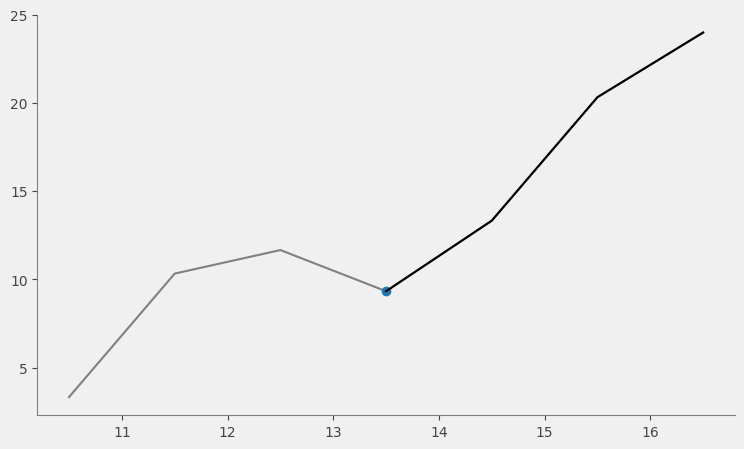

In [89]:
# keep only # actives vs hour
fig, ax = plt.subplots(figsize=(9, 5.2), facecolor="#F0F0F0")
x = count_actives_hourly["hour"]
y = count_actives_hourly["user_id"]
sns.lineplot(x=x+.5, y=y, ax=ax, color="grey")
# mark hour 13
ax.plot(13.5, count_actives_hourly[count_actives_hourly["hour"] == 13]["user_id"],
         marker="o", color="tab:blue")

# make the line after 20 black
sns.lineplot(x=x[x >= 13]+.5,
            y=y,
            linewidth=1.5,
            color="black",
            ax=ax)
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_xlim([10.2, 16.8])
ax.set_ylim([2.3, 25])
# ax.set_xlabel("Hour")# ax2.set_ylim([0, 80])
# ax.set_ylabel("# Active Participants")
# ax.set_title("Number of active participants hourly", color="grey", x=0.29, y=1.05)
# change color of the axis and lables
ax.spines[['bottom', 'left']].set_color("grey")
ax.tick_params(axis="both", colors="#444444")
# ax.yaxis.label.set_color("#444444")
# ax.xaxis.label.set_color("#444444")
# # set x and y label position
# ax.xaxis.set_label_coords(.955,-.08)
# ax.yaxis.set_label_coords(-.08,.77)
# ax.text(13, 6, f"The point where number of\ncompetitors exceeded 20.",
#         color="tab:blue")
# ax.text(10.7, 20, 
#     f"Number of active participants\nincreased as the end of the competition\ndrew closer."),
# fontsize="large")
ax.set_facecolor("#F0F0F0")
plt.show()

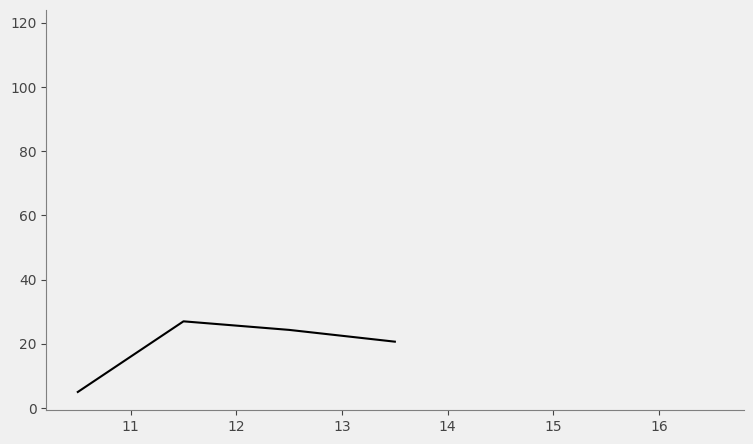

In [90]:
# since the goal was to get the most engagement let's check activity vs hour
fig, ax = plt.subplots(figsize=(9, 5.2), facecolor="#F0F0F0")
x = count_activity_hourly["hour"]
y = count_activity_hourly["user_id"]
sns.lineplot(x=x[x <=13]+.5, y=y, ax=ax, color="black")
# # mark hour 13
# ax.plot(13.5, count_activity_hourly[count_activity_hourly["hour"] == 13]["user_id"],
#          marker="o", color="tab:blue")

# # make the line after 20 black
# sns.lineplot(x=x[x >= 13]+.5,
#             y=y,
#             linewidth=1.5,
#             color="black",
#             ax=ax)
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_xlim([10.2, 16.8])
ax.set_ylim([-.7, 124])
# change color of the axis and lables
ax.spines[['bottom', 'left']].set_color("grey")
ax.tick_params(axis="both", colors="#444444")
ax.set_facecolor("#F0F0F0")
plt.show()

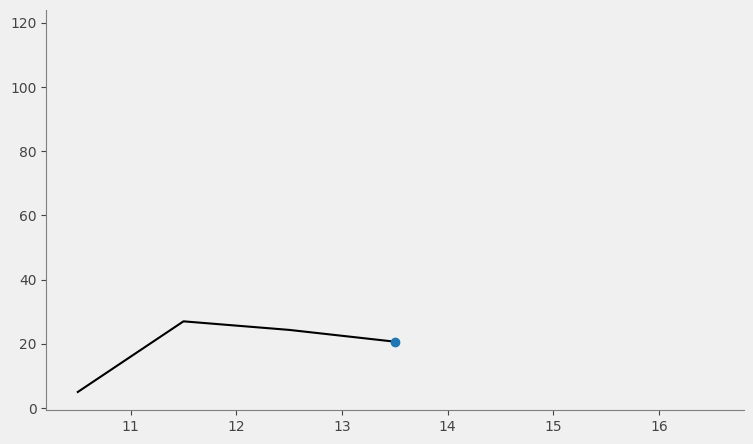

In [120]:
# since the goal was to get the most engagement let's check activity vs hour
fig, ax = plt.subplots(figsize=(9, 5.2), facecolor="#F0F0F0")
x = count_activity_hourly["hour"]
y = count_activity_hourly["user_id"]
sns.lineplot(x=x[x <=13]+.5, y=y, ax=ax, color="black")
# mark hour 13
ax.plot(13.5, count_activity_hourly[count_activity_hourly["hour"] == 13]["user_id"],
         marker="o", color="tab:blue")

# # make the line after 20 black
# sns.lineplot(x=x[x >= 13]+.5,
#             y=y,
#             linewidth=1.5,
#             color="black",
#             ax=ax)
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_xlim([10.2, 16.8])
ax.set_ylim([-.7, 124])
# change color of the axis and lables
ax.spines[['bottom', 'left']].set_color("grey")
ax.tick_params(axis="both", colors="#444444")
ax.set_facecolor("#F0F0F0")
plt.show()

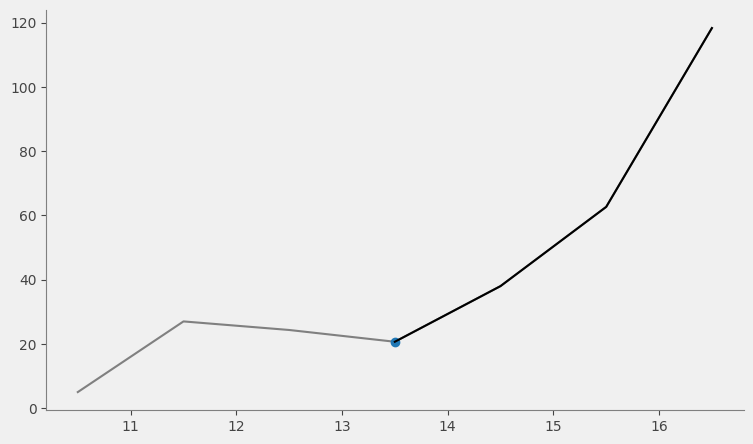

In [121]:
# since the goal was to get the most engagement let's check activity vs hour
fig, ax = plt.subplots(figsize=(9, 5.2), facecolor="#F0F0F0")
x = count_activity_hourly["hour"]
y = count_activity_hourly["user_id"]
sns.lineplot(x=x+.5, y=y, ax=ax, color="grey")
# mark hour 13
ax.plot(13.5, count_activity_hourly[count_activity_hourly["hour"] == 13]["user_id"],
         marker="o", color="tab:blue")

# make the line after 20 black
sns.lineplot(x=x[x >= 13]+.5,
            y=y,
            linewidth=1.5,
            color="black",
            ax=ax)
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
# change color of the axis and lables
ax.spines[['bottom', 'left']].set_color("grey")
ax.tick_params(axis="both", colors="#444444")
ax.set_facecolor("#F0F0F0")
plt.show()

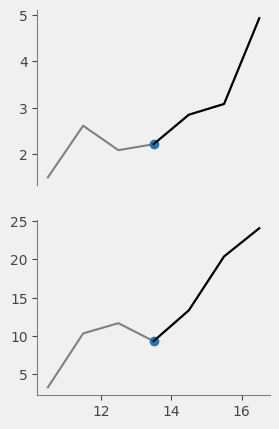

In [141]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize = (3, 5), facecolor="#F0F0F0")

x = average_activity["hour"]
y = average_activity["user_id"]
sns.lineplot(x=x+.5, y=y, ax=ax1, color="grey")
ax1.spines[['right', 'top', 'bottom']].set_visible(False)
# mark hour 13
ax1.plot(13.5, average_activity[average_activity["hour"] == 13]["user_id"],
         marker="o", color="tab:blue")

# make the line after 20 black
sns.lineplot(x=x[x >= 13]+.5,
            y=y,
            linewidth=1.5,
            color="black",
            ax=ax1)

ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)      # ticks along the bottom edge are off

x = count_actives_hourly["hour"]
y = count_actives_hourly["user_id"]
sns.lineplot(x=x+.5, y=y, ax=ax2, color="grey")
ax2.spines[['right', 'top']].set_visible(False)
# mark hour 13
ax2.plot(13.5, count_actives_hourly[count_actives_hourly["hour"] == 13]["user_id"],
         marker="o", color="tab:blue")

# make the line after 20 black
sns.lineplot(x=x[x >= 13]+.5,
            y=y,
            linewidth=1.5,
            color="black",
            ax=ax2)

for ax in [ax1, ax2]:
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    # change color of the axis and lables
    ax.spines[['bottom', 'left']].set_color("grey")
    ax.tick_params(axis="both", colors="#444444")
    ax.set_facecolor("#F0F0F0")
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_xlabel("Hour")

plt.show()

In [86]:
# compare activities among first two and last two hours
print(count_activity_hourly[count_activity_hourly["hour"] <= 12]["user_id"].sum() /\
count_actives_hourly[count_actives_hourly["hour"] <= 12]["user_id"].sum())

print(count_activity_hourly[count_activity_hourly["hour"] >= 13]["user_id"].sum() /\
count_actives_hourly[count_actives_hourly["hour"] >= 13]["user_id"].sum())

2.2236842105263155
3.577114427860697


## Leaderboard Trend

In [87]:
df = tables["points_usertransaction"]
df["day"] = pd.DatetimeIndex(df["created_dt"]).day
df["hour"] = pd.DatetimeIndex(df["created_dt"]).hour
dates = [12, 13, 14]
# look at the leader boards at hours
hours = [12+i for i in range(6)]
leaderboard_fragmented = pd.DataFrame(columns=["day", "hour", "user_id", "amount"])
for date in dates:
    for hour in hours:
        df_day_hour = df[(df["day"] == date) & (df["hour"] < hour)]
        # find the people on the leaderboard and append it to leaderboard
        to_append_df = df_day_hour.groupby("user_id")["amount"].sum().reset_index() \
            .sort_values(by=["amount"], ascending=False)[:20]
        to_append_df["day"] = date
        to_append_df["hour"] = hour
        leaderboard_fragmented = pd.concat([leaderboard_fragmented, to_append_df], ignore_index=True)
# add user personas
leaderboard_fragmented = leaderboard_fragmented.merge(df_persona[["user_id", "title"]], on="user_id")

/tmp/ipykernel_4685/1760860185.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  leaderboard_fragmented = pd.concat([leaderboard_fragmented, to_append_df], ignore_index=True)


<Axes: xlabel='hour', ylabel='amount'>

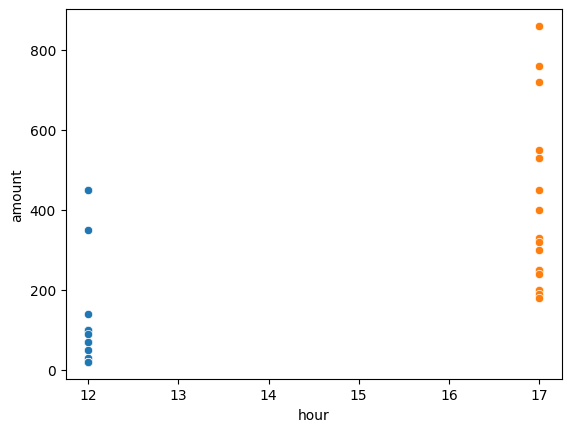

In [88]:
# visualizing fragments of the leaderboard for test

sns.scatterplot(data=leaderboard_fragmented[
                ((leaderboard_fragmented["day"] == 14) & (leaderboard_fragmented["hour"] == 12))],
                x="hour", y="amount")
sns.scatterplot(data=leaderboard_fragmented[(leaderboard_fragmented["day"] == 12) & (leaderboard_fragmented["hour"] == 17)],
                x="hour", y="amount")

<Axes: xlabel='hour', ylabel='amount'>

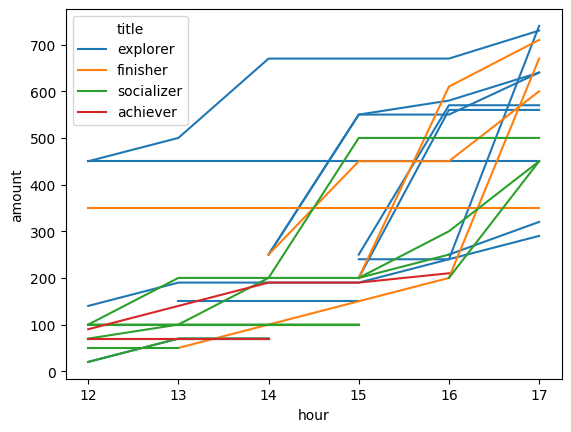

In [89]:
# follow up on every single user by lineplot
sns.lineplot(data=leaderboard_fragmented[leaderboard_fragmented["day"]==14],
             x="hour",
             y="amount",
             hue="title",
             units="user_id", estimator=None)

The cut lines means they were not in the leaderboard before or after a certain hour. Nothing obvious could be seen. What if I limit the data to the users who were finally at the leaderboard (17:00)?

In [90]:
# get winner ids
winner_ids_daily = leaderboard_fragmented[leaderboard_fragmented["hour"] == 17] \
    .groupby("day")["user_id"].unique().to_dict()
# follow each of them in the day they won
leaderboard_winners = pd.DataFrame(columns=["day", "hour", "user_id", "amount"])
for date in dates:
    for hour in hours:
        df_day_hour = df[(df["day"] == date) & (df["hour"] < hour)]
        # find the respective day scores for the leaderboard users
        for id in winner_ids_daily[date]:
            score = df_day_hour[df_day_hour["user_id"] == id]["amount"].sum()
            leaderboard_winners.loc[len(leaderboard_winners.index)] = [date, hour, id, score]
        # to_append_df["hour"] = hour
        # leaderboard_fragmented = pd.concat([leaderboard_fragmented, to_append_df], ignore_index=True)
# add user personas
leaderboard_winners = leaderboard_winners.merge(df_persona[["user_id", "title"]], on="user_id")
leaderboard_winners.head()

,day,hour,user_id,amount,title
0,12.0,12.0,109.0,0.0,socializer
1,12.0,12.0,40.0,0.0,explorer
2,12.0,12.0,116.0,0.0,socializer
3,12.0,12.0,65.0,0.0,socializer
4,12.0,12.0,103.0,0.0,explorer


(array([11.,  8.,  8.,  6.,  6.,  5.,  6.,  8.,  2.]),
 array([180.        , 255.55555556, 331.11111111, 406.66666667,
        482.22222222, 557.77777778, 633.33333333, 708.88888889,
        784.44444444, 860.        ]),
 <BarContainer object of 9 artists>)

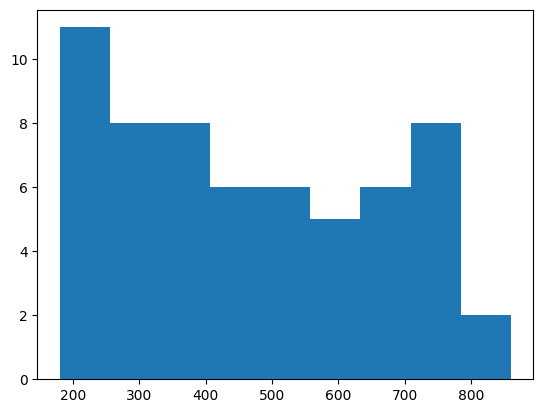

In [91]:
# check score distribution for the leaderboard winners
plt.hist(leaderboard_winners[leaderboard_winners["hour"] == 17]["amount"], bins=9)

In [99]:
# nothing that helpful from the histogram. Let's check range of scores on leaderboard for everyday
for day in range(12, 15):
    scores = leaderboard_winners[(leaderboard_winners["hour"] == 17) & 
                        (leaderboard_winners["day"] == day)]["amount"]
    print(np.ptp(scores) / np.min(scores))
    print(np.max(scores) / np.min(scores))

3.7777777777777777
4.777777777777778
2.772727272727273
3.772727272727273
1.5517241379310345
2.5517241379310347


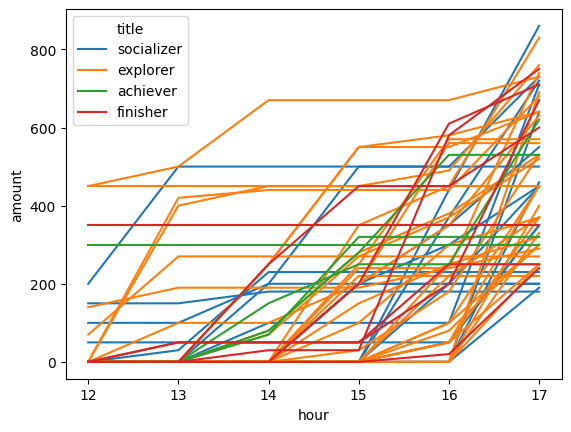

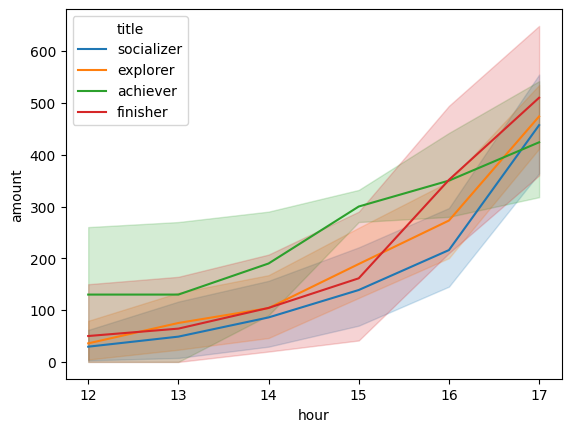

In [90]:
# individual plots
sns.lineplot(data=leaderboard_winners,
             x="hour",
             y="amount",
             hue="title",
             units="user_id", estimator=None)
plt.show()
# averaged plot
sns.lineplot(data=leaderboard_winners,
             x="hour",
             y="amount",
             hue="title")
plt.show()

### Did gamification/leaderboard work?
Was the last day higher activity because of leaderboard?

<Axes: xlabel='hour', ylabel='amount'>

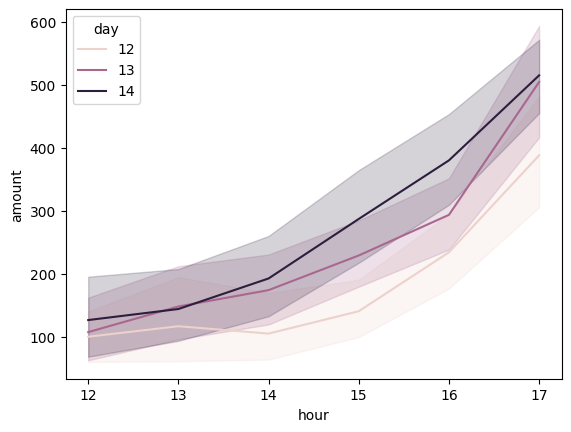

In [91]:
# trend of overall activity among leaderboards daily and hourly; last day shows higher overall activities
sns.lineplot(data=leaderboard_fragmented,
             x="hour",
             y="amount",
             hue="day",)
            #  units="user_id", estimator=None)

In [94]:
for day in range(12, 15):
    print(leaderboard_winners[leaderboard_winners["day"] == day]["amount"].describe())

count    120.000000
mean     130.083333
std      188.146625
min        0.000000
25%        0.000000
50%        0.000000
75%      200.000000
max      860.000000
Name: amount, dtype: float64
count    120.000000
mean     209.583333
std      217.349951
min        0.000000
25%        0.000000
50%      200.000000
75%      350.000000
max      830.000000
Name: amount, dtype: float64
count    120.000000
mean     231.750000
std      239.188623
min        0.000000
25%        0.000000
50%      200.000000
75%      450.000000
max      740.000000
Name: amount, dtype: float64


### Persona consistency

Check if labels were consistent with people's patterns of activity.

Another idea is to check if people were active in line with their persona. e.g. if socilizers prefered more offline activities. If explorers were more likely to be active all around the day, etc. For the start, let's check offline vouchers among personas.

In [95]:
count_transactions = df_transactions_and_questionnaires.groupby(["title", "offline"])["score"]\
                    .count().reset_index()
count_persona = df_transactions_and_questionnaires.groupby(["title"])["user_id"]\
                .nunique().reset_index()
# normalize count by the number of each persona
def normalize_persona(row):
    return row["score"] / count_persona[count_persona["title"] == row["title"]]["user_id"].to_list()[0]
count_transactions["normalized_count"] = count_transactions.apply(normalize_persona, axis=1)
count_transactions

,title,offline,score,normalized_count
0,achiever,False,40,3.076923
1,achiever,True,33,2.538462
2,explorer,False,233,2.987179
3,explorer,True,207,2.653846
4,finisher,False,55,2.619048
5,finisher,True,62,2.952381
6,socializer,False,147,2.161765
7,socializer,True,144,2.117647


We cannot see a bold pattern in terms of choosing offline vs online transactions. However, we can clearly see that socializers got less vouchers overall. Let's remove the offline column:

In [96]:
count_transactions = df_transactions_and_questionnaires.groupby(["title"])["score"]\
                    .count().reset_index()
def normalize_persona(row):
    return row["score"] / count_persona[count_persona["title"] == row["title"]]["user_id"].to_list()[0]
count_transactions["normalized_count"] = count_transactions.apply(normalize_persona, axis=1)
count_transactions

,title,score,normalized_count
0,achiever,73,5.615385
1,explorer,440,5.641026
2,finisher,117,5.571429
3,socializer,291,4.279412


<Axes: xlabel='title', ylabel='normalized_count'>

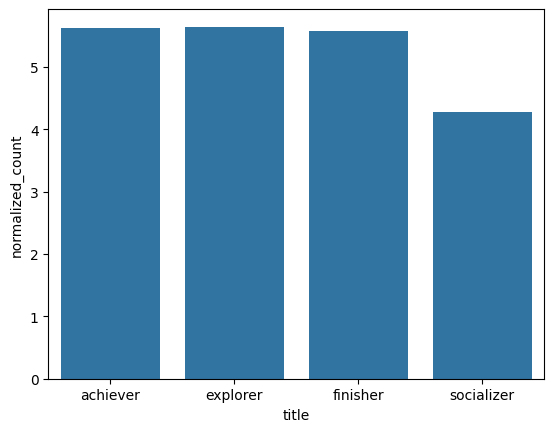

In [97]:
# add a plot for the count_transactions
sns.barplot(data=count_transactions, x="title", y= "normalized_count")


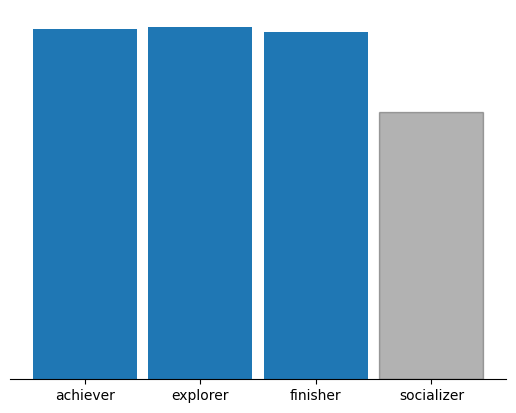

In [98]:
df = count_transactions
fig, ax = plt.subplots()

bars = plt.bar(x = df['title'], height = df['normalized_count'], color = 'tab:blue', width = 0.9)
bars[3].set_color('black')
bars[3].set_alpha(0.3)
ax.spines[['top', 'left',  'right']].set_visible(False)
# ax.bar_label(f{ax.containers[0]:.0f});
ax.set(yticks = []);
# for bar in range(3):

#     plt.text(bar, df[bar]+1, f"{df[][bar]*100}%",
#             horizontalalignment='center')
# for (m, n) in zip(range(4), df['normalized']):
#       ax.text(m + 0.07, n + 0.2, f"%", fontsize = 10)

It seems like on average to socializers, gaining a voucher was less of a priority.

### Persona engagement trends

<Axes: xlabel='title', ylabel='title'>

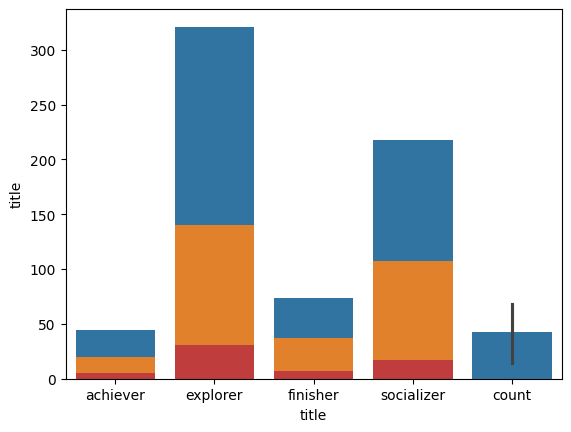

In [99]:
count_personas_leaderboard = leaderboard_winners.groupby("title")["user_id"].nunique()
sns.barplot(count_personas_sign_up)
sns.barplot(count_personas_attempt)
sns.barplot(count_personas_engaged)
sns.barplot(count_personas_leaderboard)

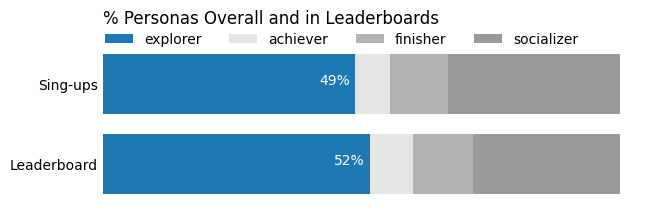

In [149]:
# make stacked normalized plot for personas overall and on leaderboard
count_persona_normal = count_personas_sign_up / count_personas_sign_up.sum()
count_persona_leaderboard_normal = count_personas_leaderboard / count_personas_leaderboard.sum()
# create a dataframe to make visualization easier
df_persona_normal = pd.DataFrame({"persona": count_persona_normal.index.to_list(),
                                "overall": count_persona_normal,
                                "leaderboard": count_persona_leaderboard_normal})
# set personas as index
df_persona_normal.set_index("persona", inplace=True)
# # find index of explorer
# explorer_idx = count_persona_normal.index.to_list().index("explorer")
ys = np.arange(2)
barwidth = .75
fig, ax = plt.subplots(1,1, figsize=(7,2))
for idx, col in enumerate(["overall", "leaderboard"]):
    left = df_persona_normal.loc["explorer"][col]
    
    for idx_p, persona in enumerate(df_persona_normal.index.to_list()):
        width = df_persona_normal.loc[persona][col]
        if persona == "explorer":
            color = "tab:blue"
            alpha = 1
            ax.barh(ys[idx],
            width=width,
            height= barwidth, label=persona, color=color, alpha=alpha)
        else:
            
            color="black"
            alpha = .1 * (idx_p + 1)
            ax.barh(ys[idx],
            width=width,
            height= barwidth, label=persona, color=color, alpha=alpha, left=left)
            left += width
    ax.text(df_persona_normal.loc["explorer"][col]-.01, 
            ys[idx], 
            f"{df_persona_normal.loc["explorer"][col] * 100 :.0f}%",
            ha="right",
            c="white")


# Hide the spines
ax.spines[['right', 'bottom', 'left', 'top']].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_yticks(ys, ["Sing-ups", "Leaderboard"])
ax.set_xticks([])
# ax.xaxis.tick_top()
ax.invert_yaxis()
# ax.set_xlabel("Day")
# ax.set_xlabel("# Sign-ups")
ax.set_title("% Personas Overall and in Leaderboards", y=1.1, loc='left')
# switch order of the legend
handles, labels = ax.get_legend_handles_labels()
order = [1,0,2,3]
ax.legend([handles[i] for i in order], [labels[i] for i in order], ncols=4,
        bbox_to_anchor=(0.44, 1.05), loc='center', frameon=False)
plt.show()

## What happend when people stopped filling questionnaires?
Was it because they have done all? Were they already in the leaderboard? Was the time up? Did they not enjoy it? Was it multiple questionnaire without a voucher?

We can have a model to see what was the case for the peopel who did continue. For this, I want to make every attempt (questionnaire filling or transaction) of each person a data point. And leaderboard checks if they were in the leaderboard after that transaction.

In [98]:
features = ["q_filled_no", "near_end", "voucher_ratio", "leaderboard", "persona"]
df = pd.DataFrame(columns=["user"] + features)

df_questionnaires = tables["questionnaire_questionnaireuserresult"]
# for now, just look at users who are in balance table
for user in tables["points_userbalance"]["user_id"]:
    if user in [20, 22]:
        continue
    df_user = df_transactions_and_questionnaires[df_transactions_and_questionnaires["user_id"] == user]
    df_user_q = df_questionnaires[df_questionnaires["user_id"] == user]
    df_user_off = df_user[df_user["offline"] == True]
    row = dict()
    row["user"] = user
    row["q_filled_no"] = len(df_user_q)
    # for checking time, let's see which happend last, the last transaction or the last q-filling
    last_dt = max(df_user_q["created_dt"].max(), df_user["created_dt_transaction"].max())
    row["near_end"] = ((last_dt.hour == 16) & (last_dt.minute > 50))
    row["voucher_ratio"] = len(df_user) / (len(df_user_q) + len(df_user_off))
    row["leaderboard"] = user in leaderboard_winners["user_id"].to_list()
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)


/tmp/ipykernel_6955/1898741924.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)


In [99]:
pd.concat([df_user_q, df_user_off])

/tmp/ipykernel_6955/1634734501.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([df_user_q, df_user_off])


,Unnamed: 0,id,created_dt,updated_dt,is_active,score,voucher,questionnaire_id,user_id,hour,...,created_dt_questionnaire,user_id_transaction,user_id_questionnaire,value,voucher_type_id,hour_transaction,hour_questionnaire,dt_done,title,offline
1185,1185.0,1199.0,2023-11-14 16:21:56.324878+03:30,2023-11-14 16:21:56.324896+03:30,True,3.0,NaN,2,402.0,16.0,...,NaT,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaT,NaN,NaN
1187,1187.0,1201.0,2023-11-14 16:23:16.525825+03:30,2023-11-14 16:23:16.525843+03:30,True,1.0,NaN,3,402.0,16.0,...,NaT,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaT,NaN,NaN
1194,1194.0,1208.0,2023-11-14 16:25:45.678266+03:30,2023-11-14 16:25:45.678281+03:30,True,3.0,NaN,6,402.0,16.0,...,NaT,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaT,NaN,NaN
1200,1200.0,1214.0,2023-11-14 16:27:06.730710+03:30,2023-11-14 16:27:06.730726+03:30,True,4.0,7DN232IAZD,11,402.0,16.0,...,NaT,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaT,NaN,NaN
1203,1203.0,1217.0,2023-11-14 16:28:52.856292+03:30,2023-11-14 16:28:52.856309+03:30,True,2.0,NaN,10,402.0,16.0,...,NaT,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaT,NaN,NaN
1205,1205.0,1219.0,2023-11-14 16:29:38.922672+03:30,2023-11-14 16:29:38.922692+03:30,True,2.0,NaN,9,402.0,16.0,...,NaT,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaT,NaN,NaN
1206,1206.0,1220.0,2023-11-14 16:31:00.543950+03:30,2023-11-14 16:31:00.543983+03:30,True,1.0,NaN,7,402.0,16.0,...,NaT,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaT,NaN,NaN
1209,1209.0,1223.0,2023-11-14 16:31:28.469033+03:30,2023-11-14 16:31:28.469053+03:30,True,0.0,NaN,4,402.0,16.0,...,NaT,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaT,NaN,NaN


In [100]:
df[(df["near_end"]== False) & (df["leaderboard"]== False) & (df["q_filled_no"]> 3)]

,user,q_filled_no,near_end,voucher_ratio,leaderboard,persona
0,143,7,False,0.125000,False,NaN
1,114,10,False,0.100000,False,NaN
6,68,10,False,0.100000,False,NaN
9,290,7,False,0.142857,False,NaN
26,35,4,False,0.500000,False,NaN
34,44,4,False,0.250000,False,NaN
35,255,4,False,0.200000,False,NaN
36,97,10,False,0.100000,False,NaN
52,118,9,False,0.222222,False,NaN
56,47,10,False,0.300000,False,NaN


We can apply a generalized linear regression to predict what was effective when people stopped or continued. But I did not see a point in running that! Because at first I thought it could give some insight on the more boring questionnaires, but then I realized that since we don't have access to half-copmpleted questionnaires, we cannot say where exactly people stopped engaging.

In [102]:
df_transactions_and_questionnaires[df_transactions_and_questionnaires["hour_transaction"] == 16].sort_values(by="created_dt_transaction")

,created_dt_transaction,created_dt_questionnaire,user_id_transaction,user_id_questionnaire,score,value,voucher_type_id,questionnaire_id,hour_transaction,hour_questionnaire,dt_done,user_id,title,offline
736,2023-11-12 16:00:47.604855+03:30,NaT,116,<NA>,30,W9847Y2BSZ,2,<NA>,16,<NA>,2023-11-12 16:00:47.604855+03:30,116.0,socializer,True
739,2023-11-12 16:01:09.023558+03:30,NaT,40,<NA>,30,QVRS10N1V6,2,<NA>,16,<NA>,2023-11-12 16:01:09.023558+03:30,40.0,explorer,True
84,2023-11-12 16:04:28.441518+03:30,2023-11-12 16:04:23.582949+03:30,103,103,50,YV2WW3SKJK,15,5,16,16,2023-11-12 16:04:23.582949+03:30,103.0,explorer,False
678,2023-11-12 16:04:59.738253+03:30,NaT,103,<NA>,30,YUZW4C615M,2,<NA>,16,<NA>,2023-11-12 16:04:59.738253+03:30,103.0,explorer,True
86,2023-11-12 16:05:25.063193+03:30,2023-11-12 16:05:16.394370+03:30,107,107,50,11MW5E44LT,15,5,16,16,2023-11-12 16:05:16.394370+03:30,107.0,explorer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,2023-11-14 16:51:33.124902+03:30,NaT,681,<NA>,20,F6AXCNVV7K,1,<NA>,16,<NA>,2023-11-14 16:51:33.124902+03:30,681.0,socializer,True
864,2023-11-14 16:52:10.927474+03:30,NaT,681,<NA>,50,YGZBSZ4K09,3,<NA>,16,<NA>,2023-11-14 16:52:10.927474+03:30,681.0,socializer,True
877,2023-11-14 16:52:29.416378+03:30,NaT,681,<NA>,50,J2FFNTXHAC,3,<NA>,16,<NA>,2023-11-14 16:52:29.416378+03:30,681.0,socializer,True
726,2023-11-14 16:52:39.089033+03:30,NaT,103,<NA>,30,OY61SLW0VD,2,<NA>,16,<NA>,2023-11-14 16:52:39.089033+03:30,103.0,explorer,True
